# Predict House Prices in depth EDA

Here [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) `Kaggle's competition` dataset is used.

**While doing this we'll go through:**
- Removing outliers using `IQR` and `z-score` methods
- Visualizing `categorical` and `continuous` variables
- How to process `string` dtype columns for building `machine learning model`
- Dealing with `missing` values

![](https://media.giphy.com/media/Ln2dAW9oycjgmTpjX9/giphy.gif)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore, pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, learning_curve

from joblib import dump, load

In [2]:
# Pandas config
def pandas_config():
    # display 10 rows and all the columns
    pd.set_option('display.max_rows', 10)
    pd.set_option('display.max_columns', None)
    
pandas_config()

`Helper functions` to load datasets.

In [3]:
# Load training dataset
def load_training_dataset():
    path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
    return pd.read_csv(path)


# Load testing dataset
def load_testing_dataset():
    path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
    return pd.read_csv(path)


# Dataset description
def dataset_description():
    path = '/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt'
    with open(path, 'r') as f:
        description = f.read()
    print(description)

In [4]:
df = load_training_dataset()
df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
75      76         180       RM         21.0     1596   Pave   NaN      Reg   
1276  1277          60       RL          NaN    12936   Pave   NaN      IR1   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   
883    884          75       RL         60.0     6204   Pave   NaN      Reg   
449    450          50       RM         50.0     6000   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
75           Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1276         Lvl    AllPub   CulDSac       Gtl       NWAmes       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
883          Bnk    AllPub    Inside       Gtl        SWISU       Norm   
449          Lvl    AllPub    Inside       Gtl      OldTown       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
75         Norm    Twnhs       SLvl            4            5       1973   
1276       Norm     1Fam     2Story            6            6       1972   
1278       Norm     1Fam     2Story            8            5       2002   
883        Norm     1Fam     2.5Fin            4            5       1912   
449        Norm     1Fam     1.5Fin            3            7       1948   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
75            1973     Gable  CompShg     CemntBd     CmentBd       None   
1276          1972     Gable  CompShg     HdBoard     Plywood       None   
1278          2002     Gable  CompShg     VinylSd     VinylSd        NaN   
883           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
449           2002     Gable  CompShg     MetalSd     MetalSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
75           0.0        TA        TA     CBlock       Gd       TA   
1276         0.0        TA        TA     CBlock       TA       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   
883          0.0        Gd        TA      PConc       TA       Fa   
449          0.0        TA        Gd     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
75             Gd          GLQ         462          Unf           0   
1276           No          BLQ         593          Unf           0   
1278           No          GLQ         804          Unf           0   
883            No          Unf           0          Unf           0   
449            No          ALQ         331          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
75            0          462    GasA        TA          Y      SBrkr   
1276        130          723    GasA        TA          Y      SBrkr   
1278        324         1128    GasA        Ex          Y      SBrkr   
883         795          795    GasA        TA          N      SBrkr   
449         318          649    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
75         526       462             0        988             1             0   
1276       735       660             0       1395             0             1   
1278      1128       903             0       2031             1             0   
883        954       795           481       2230             1             0   
449        679       504             0       1183             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
75           1         0             2             1          TA   
1276         1         1             3             1          TA   
1278         2         1             3             1          Gd   
883          1         0             5             1          TA   
449          1         1             2             1          TA   

   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 🧱 Data Preparation

![](https://media.giphy.com/media/TuZ8v66TzGeYJW23as/giphy.gif)

In [6]:
# Drop df column
def drop_df_column(df, column_name, inplace=True):
    return df.drop([column_name], axis='columns', inplace=inplace)

In [7]:
drop_df_column(df, 'Id')

Separating df with `continous` & `categorical` variables and preparing the data separately and at the end when all the data is ready, we combine the continous & categorical columns into one df and then do `EDA`.

In [8]:
# Get df with columns having continuous variables
def get_continuous_df(df):
    return df.select_dtypes(include=[np.int64, np.float64])


# Get df with columns having categorical variables
def get_categorical_df(df):
    return df.select_dtypes(include=['object'])

Get columns names in as sentence (instead of getting long list of column names).

In [9]:
def get_column_names(df):
    for column_name in df.columns.tolist():
        print(f'{column_name} | ', end='')

While dropping any row, keep the `continuous_df` & `categorical_df` in sync as at the end when the data is prepared these both dfs are going to join to create out main df on which we'll do our EDA.

### Continuous Variables

In [10]:
continuous_df = get_continuous_df(df)
continuous_df.reset_index(drop=True, inplace=True)
continuous_df.sample(5)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1158          20         92.0    11932            8            5       2007   
387           80         72.0     7200            6            6       1976   
13            20         91.0    10652            7            5       2006   
1025          20         70.0     7700            5            5       1972   
160           20          NaN    11120            6            6       1984   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1158          2008       186.0           0           0       1580   
387           1976       255.0         631           0        410   
13            2007       306.0           0           0       1494   
1025          1972         0.0         138         468        276   
160           1984         0.0         660           0        572   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1158         1580      1580         0             0       1580             0   
387          1041      1125         0             0       1125             1   
13           1494      1494         0             0       1494             0   
1025          882       882         0             0        882             1   
160          1232      1232         0             0       1232             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1158             0         2         0             3             1   
387              0         1         0             3             1   
13               0         2         0             3             1   
1025             0         1         0             3             1   
160              0         2         0             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1158             7           0       2008.0           3         830   
387              6           1       1977.0           1         352   
13               7           1       2006.0           3         840   
1025             5           0       1980.0           2         461   
160              6           0       1984.0           2         516   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1158           0           24              0          0            0   
387          296            0              0          0            0   
13           160           33              0          0            0   
1025          96            0              0          0            0   
160            0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  SalePrice  
1158         0        0       6    2008     235128  
387          0        0      10    2009     125000  
13           0        0       8    2007     279500  
1025         0        0       3    2007     112500  
160          0        0       6    2008     162500

In [11]:
get_column_names(continuous_df)

MSSubClass | LotFrontage | LotArea | OverallQual | OverallCond | YearBuilt | YearRemodAdd | MasVnrArea | BsmtFinSF1 | BsmtFinSF2 | BsmtUnfSF | TotalBsmtSF | 1stFlrSF | 2ndFlrSF | LowQualFinSF | GrLivArea | BsmtFullBath | BsmtHalfBath | FullBath | HalfBath | BedroomAbvGr | KitchenAbvGr | TotRmsAbvGrd | Fireplaces | GarageYrBlt | GarageCars | GarageArea | WoodDeckSF | OpenPorchSF | EnclosedPorch | 3SsnPorch | ScreenPorch | PoolArea | MiscVal | MoSold | YrSold | SalePrice | 

In [12]:
# Get list of names of columns that contains nan in df
def get_nan_columns(df):
    return df.columns[df.isna().any()].tolist()

In [13]:
nan_columns = get_nan_columns(continuous_df)
print(f'Columns that contains NaN values: {nan_columns}\n')

continuous_df[nan_columns].info()

Columns that contains NaN values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [14]:
'''
  This will tell two rows are closely related

  NOTE: This is not a perfect function as difference between two years
  & difference between two areas & other properties like that are 
  compared using the same threshold. To apply those different comparisons
  `property_alias` variable's list will help. Some of different comparisons
  like year, quality_threshold & area are taken can & others will have a 
  `base_threshold`.
'''


def distance_formula(_from, to):
    return np.sqrt((_from - to) * (_from - to))


def compare_thresholds(distance, column_name):
    base_threshold = 5
    year_threshold = 5
    area_threshold = 400
    quality_threshold = 5

    year_alias = ['Yr', 'Year']
    area_alias = ['Area']
    quality_alias = ['Qual']

    if any([string in column_name for string in year_alias]):
        return distance <= year_threshold
    if any([string in column_name for string in area_alias]):
        return distance <= area_threshold
    if any([string in column_name for string in quality_alias]):
        return distance <= quality_threshold
    else:
        return distance <= base_threshold


def is_it_close(_from_row, to_row):
    results = []
    for idx, (_from, to) in enumerate(zip(_from_row, to_row)):
        distance = distance_formula(_from, to)
        if not compare_thresholds(distance, _from_row.index.tolist()[idx]):
            return False
    return True


# Columns with year having NaN
def refactor_nan_in_continuous_column(df, column_name):
    # Getting 5 columns who have high correlation with `column_name`
    cor = df.corr()[[column_name]].sort_values(by=column_name, ascending=False)[:6]
    sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
    high_corr_columns = cor.index.tolist()

    # all nan row of a `column_name`
    nan_df = df[df[column_name].isnull()][high_corr_columns]
    not_nan_df = df[~df[column_name].isnull()][high_corr_columns]

    for from_idx in nan_df.index.tolist():
        # years of rows which are closely similar to current row
        years = []
        
        # ---> 59         _from_row = nan_df.iloc[from_idx]
        # IndexError: single positional indexer is out-of-bounds
        # 
        # To avoid the above error, using `loc`
        _from_row = nan_df.loc[from_idx].copy()
        
        # columns to use for distance formula & comparisons 
        comparisons_columns = [name for name in high_corr_columns if name != column_name]

        # iterating through non nan rows to find the rows
        # having closest values
        for to_idx in not_nan_df.index.tolist():
            # ---> 71             to_row = not_nan_df.iloc[to_idx]
            # IndexError: single positional indexer is out-of-bounds
            #
            # To avoid the above error, using `loc`
            to_row = not_nan_df.loc[to_idx].copy()
            
            if is_it_close(_from_row.loc[comparisons_columns], to_row.loc[comparisons_columns]):
                years.append(to_row[column_name])

        # updating value from NaN to avg 
        df[column_name].loc[from_idx] = np.nan if len(years) == 0 else sum(years) / len(years)
        

'''
    The solution above is cool (might be good) but is computationally expensive & not sure
    that it's good way.
'''

        
# refactor_nan_in_continuous_column(continuous_df, 'GarageYrBlt')
# Remaining nan values in `GarageYrBlt`, giving them avg of `GarageYrBlt`
# print(len(continuous_df[continuous_df.GarageYrBlt.isnull()]))
# continuous_df.GarageYrBlt.fillna(df.GarageYrBlt.mean(), inplace=True)

# refactor_nan_in_continuous_column(continuous_df, 'LotFrontage')
# Remaining nan values in `LotFrontage`, giving them avg of `LotFrontage`
# print(len(continuous_df[continuous_df.LotFrontage.isnull()]))
# continuous_df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)

# etc...

"\n    The solution above is cool (might be good) but is computationally expensive & not sure\n    that it's good way.\n"

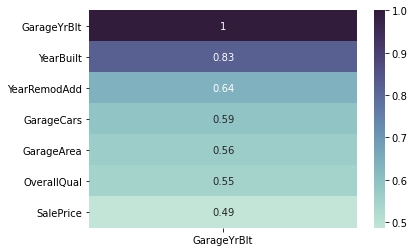

In [15]:
# Pearson correlation of a column with respect to others
def corr_of_a_column(df, column_name, how_many=None, ax=None):
    how_many = len(df) if how_many == None else how_many
    cor = df.corr()[[column_name]].sort_values(
        by=column_name, ascending=False
    )[:how_many]
    sns.heatmap(cor, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax)


corr_of_a_column(continuous_df, 'GarageYrBlt', 7)

By looking at corr plot we can say that `YearBuilt` is highly correlated with `GarageYrBlt`

In [16]:
# Checking how much is one column equal to the other
def column_equality_check(df, first_column_name, second_column_name):
    equal_row_idxs = np.where(df[first_column_name] == df[second_column_name])
    return {
        'percent': round(len(equal_row_idxs[0]) / len(df), 2) * 100,
        'equal_indexes': equal_row_idxs
    }

results = column_equality_check(continuous_df, 'YearBuilt', 'GarageYrBlt')
print(f"{results['percent']}% of rows of YearBuilt & GarageYrBlt are equal")

75.0% of rows of YearBuilt & GarageYrBlt are equal


In [17]:
# As 75% of rows of YearBuilt & GarageYrBlt are equal
# assigning YearBuilt to GarageYrBlt where GarageYrBlt is NaN
def refactor_GarageYrBlt(df):
    idxs = df[df.GarageYrBlt.isnull()].index.tolist()
    for _id in idxs:
        df.at[_id, 'GarageYrBlt'] = df.at[_id, 'YearBuilt']

        
refactor_GarageYrBlt(continuous_df)

In [18]:
results = column_equality_check(continuous_df, 'YearBuilt', 'GarageYrBlt')
print(f"{results['percent']}% of rows of YearBuilt & GarageYrBlt are equal")

80.0% of rows of YearBuilt & GarageYrBlt are equal


Missing values problem in `GarageYrBlt` is solved

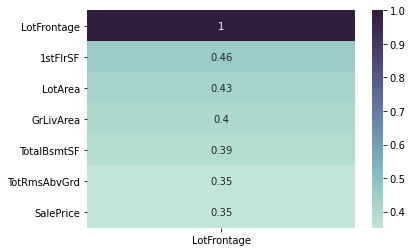

In [19]:
corr_of_a_column(continuous_df, 'LotFrontage', 7)

In [20]:
# Substituting NaN values of a column with its average value
def fillna_with_mean(df, column_name):
    nan_idxs = df[df[column_name].isnull()].index.tolist()
    df.loc[nan_idxs, column_name] = df[column_name].fillna(
        df[column_name].mean()
    ).loc[nan_idxs]
    return df


continuous_df = fillna_with_mean(continuous_df.copy(), 'LotFrontage')

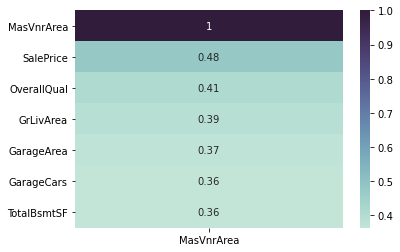

In [21]:
corr_of_a_column(continuous_df, 'MasVnrArea', 7)
# Substituting NaN values of a `MasVnrArea` with its average value
continuous_df = fillna_with_mean(continuous_df.copy(), 'MasVnrArea')

In [22]:
nan_columns = get_nan_columns(continuous_df)
print(f'Columns that contains NaN values: {nan_columns}')

Columns that contains NaN values: []


There are no NaN values in any column in `continuous_df`

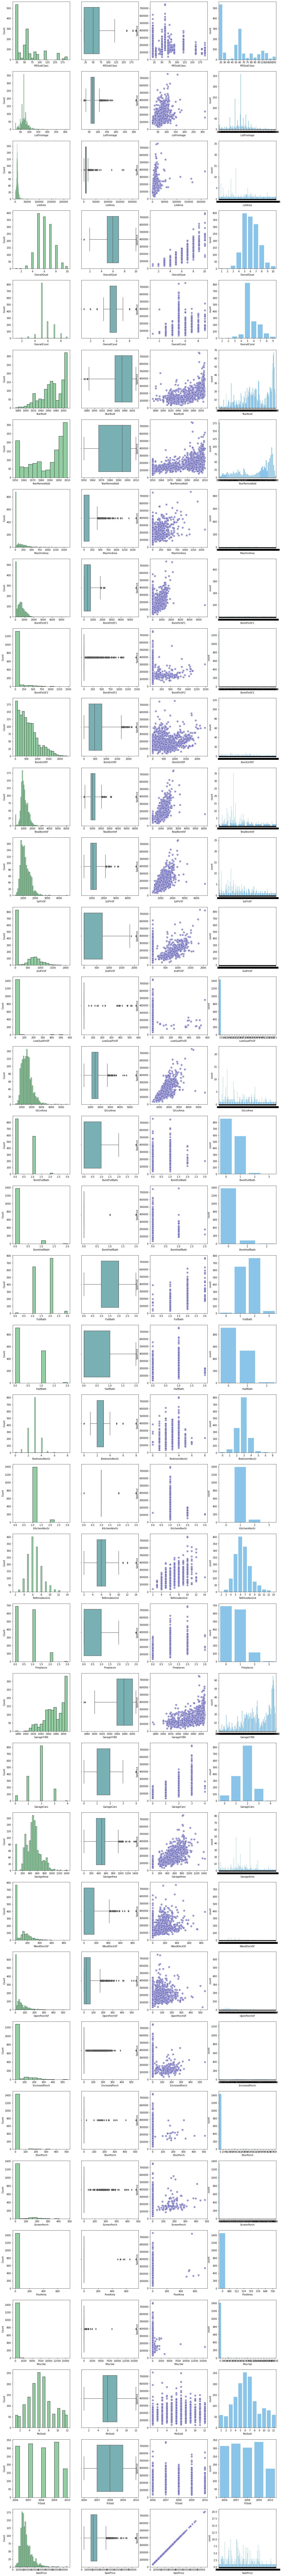

In [23]:
def plot_base_relation(df, figsize=(20, 200)):
    columns = df.columns.tolist()
    _, axs = plt.subplots(len(columns), 4, figsize=figsize)
    
    for idx, column in enumerate(columns):
        # To get distribution of data
        sns.histplot(
            x=df[column],
            kde=False,
            color='#65b87b', alpha=.7,
            ax=axs[idx][0]
        )

        # To get knowledge about outliers
        sns.boxplot(
            x=df[column],
            color='#6fb9bd',
            ax=axs[idx][1]
        )

        # To get its realtion with SalePrice
        sns.scatterplot(
            x=column, y='SalePrice', data=df,
            color='#706dbd', alpha=.7, s=80,
            ax=axs[idx][2]
        )
        
        # To get count plot for `column`
        sns.countplot(
            x=column, data=df,
            color='#42b0f5', alpha=.7,
            ax=axs[idx][3]
        )
        
        
plot_base_relation(continuous_df)

Dropping columns where the majority of data points are concentrated in one value, like if there are 100 data points and 90 of them have same value then dropping such columns as these columns provide no useful info in predicting the SalePrice

In [24]:
def drop_uneven_column(df, column_name, _next=print):
    print(f'{column_name}:\nUnique value count: {df[column_name].value_counts().tolist()}')
    drop_df_column(df, column_name)
    _next()

In [25]:
drop_uneven_column(continuous_df, 'LowQualFinSF')
drop_uneven_column(continuous_df, 'BsmtHalfBath')
drop_uneven_column(continuous_df, 'MiscVal')
# drop_uneven_column(continuous_df, 'ScreenPorch')
drop_uneven_column(continuous_df, '3SsnPorch')
# drop_uneven_column(continuous_df, 'EnclosedPorch')
# drop_uneven_column(continuous_df, 'OpenPorchSF')
# drop_uneven_column(continuous_df, 'WoodDeckSF')
drop_uneven_column(continuous_df, 'KitchenAbvGr')

# The code commented have the columns where though the majority of data points have same value but 
# there are other different values, therefore decided to keep these columns

LowQualFinSF:
Unique value count: [1434, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

BsmtHalfBath:
Unique value count: [1378, 80, 2]

MiscVal:
Unique value count: [1408, 11, 8, 5, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

3SsnPorch:
Unique value count: [1436, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

KitchenAbvGr:
Unique value count: [1392, 65, 2, 1]



A lot of columns have issue of outliers. Using `IQR` & `Zscores` method to deal with it.

In [26]:
# tmp = pd.DataFrame({
#     'a': [1, 2, 3],
#     'b': [5, 6, 7],
# }, index=[1, 3, 4, 8])

# print(tmp.a.loc[tmp.a % 2 == 0])
# np.where(tmp.a.loc[tmp.a % 2 == 0])

In [27]:
# Removing outliers using IQR method
def rm_outliers_in_col_using_iqr(df, col):
    # col here is df.column_name (or df[column_name])

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    outliers_row_idx = col.loc[
        (col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR))
    ].index.tolist()

    df = df.drop(outliers_row_idx, axis='rows')
    return (outliers_row_idx, df)


# Removing outliers using the Zscore method
def rm_outliers_in_col_using_zscore(df, col, column_name):
    # col here is df.column_name (or df[column_name])
    
    zscores_df = pd.DataFrame({
        f'{column_name}': col.to_numpy()
    }, df.index.tolist())
    
    zscores_df['zscores'] = zscores_df.apply(lambda x: zscore(x))
    outliers_row_idx = zscores_df[np.abs(zscores_df.zscores) > 3].index.tolist()

    df = df.drop(outliers_row_idx, axis='rows')
    return (outliers_row_idx, df)


# Remove outliers of a column using iqr & zscore methods
def remove_outliers_of_a_column(df, column_name):
    rm_idxs = []
    for _ in range(10):
        outliers_row_idx, df = rm_outliers_in_col_using_iqr(df, df[column_name])
        rm_idxs.extend(outliers_row_idx)
        
        outliers_row_idx, df = rm_outliers_in_col_using_zscore(df, df[column_name], column_name)
        rm_idxs.extend(outliers_row_idx)
    return rm_idxs, df


# Remove outliers of a df using iqr & zscore methods
def remove_outliers_of_df(df):
    rm_rows_idxs = []
    for column in df.columns.tolist():
        if column == 'SalePrice':
            # As we don't want to do anything with `SalePrice`
            continue
            
        rm_idxs, df = remove_outliers_of_a_column(df, column)
        rm_rows_idxs.extend(rm_idxs)
    return rm_rows_idxs, df

In [28]:
# A better flow of logic for removing the outliers using zscores

# num_df = df.select_dtypes(include=["number"])
# cat_df = df.select_dtypes(exclude=["number"])

# idx = np.all(zscore(num_df) > 3, axis=1)
# cleaned_df = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)

# Q1 = num_df.quantile(0.02)
# Q3 = num_df.quantile(0.98)
# IQR = Q3 - Q1

# idx = ~((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=1)
# cleaned_df = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)

In [29]:
# rm_rows_idxs, continuous_df = remove_outliers_of_df(continuous_df)

'''
    If you removed all the outliers in `continuous_df` then only 1/10th of the data is remaining.
    So instead of going through all the columns in df at once, we will go through each column at 
    a time and if the columns has 2% of outliners then we drop that column. Keeping the threshold 
    as 2% because if keep threshold higher then collectivetly a lot of rows will drop which in turn
    reduces our dataset 
    
    eg. if threshold is 20% then column1 (if there are 15% outliers then remove the rows) then 
    column2 (if there are 10% outliers then remove the rows) so in total we end up dropping 
    15% + 10% = 30% of our rows.
    
    So to avoid this we are keeping threshold as 2%
'''

# To do the above thing we can just modify the `remove_outliers_of_df` func
def remove_outliers_of_df_with_threshold(df, threshold=2):
    # `threshold` here is the percent above which the entire 
    # column will be dropped 

    rm_rows_idxs = []
    for column in df.columns.tolist():
        if column == 'SalePrice':
            # As we don't want to do anything with `SalePrice`
            continue
            
        rm_idxs, tmp_df = remove_outliers_of_a_column(df, column)

        if round(len(rm_idxs) / len(df), 2) * 100 > threshold:
            drop_df_column(df, column)
        else:
            df = tmp_df.copy()
            del tmp_df
            rm_rows_idxs.extend(rm_idxs)
   
    return rm_rows_idxs, df



with np.errstate(divide='ignore', invalid='ignore'):
    # /opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
    #  return (a - mns) / sstd
    # 
    # To avoid the above error which happens while calculating the zscore as std(sstd) vanishes => (a - mns) / sstd
    
    print('=== Old df info ===')
    print(continuous_df.info())
    
    RM_ROWS_IDXS, continuous_df = remove_outliers_of_df_with_threshold(continuous_df)
    
    print('\n=== New df info ===\n')
    print(continuous_df.info())

=== Old df info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   i

In [30]:
print(f'{len(RM_ROWS_IDXS)} columns are dropped while removing outliers')

127 columns are dropped while removing outliers


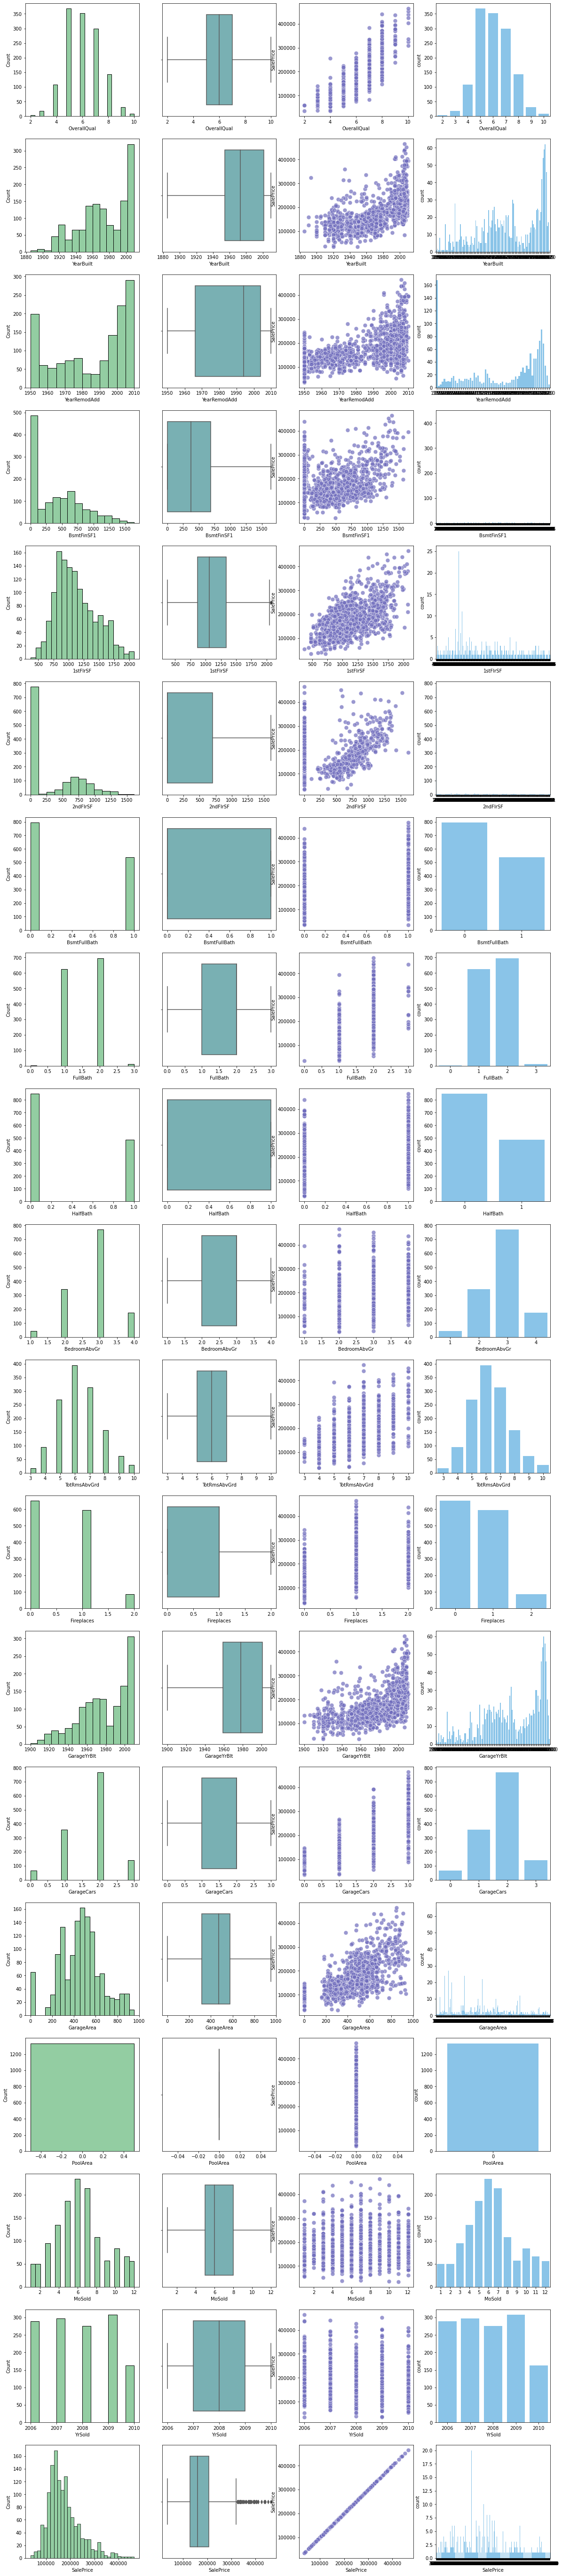

In [31]:
plot_base_relation(continuous_df, (20, 100))

In [32]:
print(continuous_df.PoolArea.unique())
drop_df_column(continuous_df, 'PoolArea')

[0]


In [33]:
continuous_df.sample(5)

OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
644             9       2009          2009        1121      1766         0   
373             5       1953          1953         428      1319         0   
944             6       1958          1958         111      1344         0   
327             6       1960          1960         565      1383         0   
1375            8       2007          2007           0      1571         0   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
644              1         2         1             2             7   
373              1         1         0             3             5   
944              0         1         0             3             7   
327              0         1         1             3             7   
1375             0         2         0             3             7   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea  MoSold  YrSold  \
644            1       2009.0           3         478      10    2009   
373            0       1953.0           1         270      11    2009   
944            1       1958.0           2         525       1    2009   
327            0       1960.0           1         292       4    2006   
1375           1       2007.0           3         722      12    2007   

      SalePrice  
644      370878  
373      123000  
944      137500  
327      145250  
1375     239000

Just for good comparasion between `features` and `traget` variables I have scaled `SalePrice` column in the dataframe, but while creating the machine learning model I have used the `not scaled` SalePrice data (which is stored in the `original_y` variable), this will have no effect on the model since features will be used for prediction and not the target variable and all computational effects depends on features.

In [34]:
# This value if assigned after the removal of outliers 
original_y = continuous_df[['SalePrice']]
original_y.loc[:5]

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000
5     143000

In [35]:
# Scaling int & float dtype column
def standard_scaler(column):
    # Bumping up the ndim by np.newaxis as column.values is 1D & fit_transform needs 2D
    return StandardScaler().fit_transform(column.values[:, np.newaxis])


# Scaling all int & float dtype columns 
def scaling_df(df):
    # Selecting columns which have number dtype
    numbers_df = df.select_dtypes(include=[np.int64, np.float64])

    for column_name in numbers_df.columns.tolist():
        df[column_name] = standard_scaler(df[column_name])
    return df


# Scaling `continuous_df` for EDA 
scaling_df(continuous_df)

continuous_df.sample(5)

OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
367     -0.034272  -0.340664     -1.090815   -0.117474  0.934558 -0.786031   
868     -0.795680  -0.819137     -1.666526   -1.032975  1.284522  0.972352   
223     -1.557088  -0.033074     -0.659031    0.260078 -0.776041 -0.786031   
1337    -1.557088  -1.058373     -1.666526   -1.032975 -1.291936 -0.786031   
133      1.488544   0.992225      0.828224    1.447021  0.527273 -0.786031   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
367      -0.822636 -1.042003 -0.756263      0.277931     -0.226053   
868      -0.822636  0.889833 -0.756263     -1.163632      0.489692   
223      -0.822636 -1.042003 -0.756263     -1.163632     -1.657543   
1337     -0.822636 -1.042003 -0.756263     -1.163632     -1.657543   
133       1.215605  0.889833 -0.756263     -1.163632     -0.226053   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea    MoSold    YrSold  \
367     0.691279    -0.575997   -1.044373   -0.846871  2.115247  0.135606   
868     0.691279     0.082630    0.367543    1.071941 -0.485882 -1.364504   
223    -0.942542     0.470058    0.367543    0.582032 -1.229062  0.885662   
1337   -0.942542    -1.389595   -2.456289   -2.357425 -1.229062 -1.364504   
133    -0.942542     0.934971    0.367543    0.046193 -0.114292  0.885662   

      SalePrice  
367   -0.134393  
868   -0.074957  
223   -1.144791  
1337  -1.806007  
133    0.682841

### Categorical Variables

In [36]:
categorical_df = get_categorical_df(df)
categorical_df.sample(5)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1319       RL   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl   
349        RL   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl   
334        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
460        FV   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1271       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
1319      Edwards       Norm       Norm     1Fam     1Story       Hip   
349       NridgHt       Norm       Norm     1Fam     2Story       Hip   
334       Gilbert       Norm       Norm     1Fam     2Story     Gable   
460       Somerst       RRAn       Norm     1Fam     2Story     Gable   
1271       NWAmes       PosN       Norm     1Fam     1Story       Hip   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
1319  CompShg     Wd Sdng     Wd Sdng    BrkFace        TA        TA   
349   CompShg     CemntBd     CmentBd    BrkFace        Ex        TA   
334   CompShg     VinylSd     VinylSd       None        TA        TA   
460   CompShg     VinylSd     VinylSd      Stone        Gd        TA   
1271  CompShg     BrkFace     BrkFace       None        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
1319      PConc       TA       TA           No          ALQ          Unf   
349       PConc       Ex       TA           No          GLQ          Unf   
334       PConc       Gd       TA           Gd          GLQ          Unf   
460       PConc       Gd       TA           No          GLQ          Unf   
1271     CBlock       TA       TA           No          Unf          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
1319    GasA        Ex          Y      SBrkr          TA        Typ   
349     GasA        Ex          Y      SBrkr          Ex        Typ   
334     GasA        Gd          Y      SBrkr          TA        Typ   
460     GasA        Ex          Y      SBrkr          TA        Typ   
1271    GasA        Gd          Y      SBrkr          Gd        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
1319         NaN     Attchd          Unf         TA         TA          Y   
349           Ex     Attchd          Fin         TA         TA          Y   
334           TA     Attchd          Fin         TA         TA          Y   
460          NaN    BuiltIn          Fin         TA         TA          Y   
1271          Gd     Attchd          RFn         TA         TA          Y   

     PoolQC Fence MiscFeature SaleType SaleCondition  
1319    NaN   NaN         NaN       WD        Normal  
349     NaN   NaN         NaN      New       Partial  
334     NaN   NaN         NaN       WD        Normal  
460     NaN   NaN         NaN      New       Partial  
1271    NaN   NaN         NaN       WD        Normal

In [37]:
len(original_y)

1333

In [38]:
print(f'Original categorica_df size: {len(categorical_df)}')

# Removing rows which were removed in `continuous_df`
categorical_df = categorical_df.drop(RM_ROWS_IDXS, axis='rows')

# Adding `SalePrice` column
categorical_df = pd.concat([categorical_df, original_y], axis='columns')

print(f'New categorica_df size: {len(categorical_df)}')

Original categorica_df size: 1460
New categorica_df size: 1333


In [39]:
print(RM_ROWS_IDXS[:10])
# categorical_df.loc[RM_ROWS_IDXS[0]] # <= KeyError

[375, 533, 304, 630, 747, 991, 1132, 1137, 1349, 53]


In [40]:
categorical_df.sample(5)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1259       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
598        RL   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl   
512        RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
801        RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
387        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
1259        NAmes       Norm       Norm     1Fam     1Story     Gable   
598       Crawfor       Norm       Norm     1Fam     1Story     Gable   
512         NAmes      Feedr       Norm     1Fam     1Story     Gable   
801        IDOTRR       Norm       Norm     1Fam     1Story     Gable   
387       Edwards       Norm       Norm     1Fam       SLvl       Hip   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
1259  CompShg     HdBoard     HdBoard       None        TA        TA   
598   CompShg     Plywood     Plywood    BrkFace        TA        TA   
512   CompShg     VinylSd     VinylSd       None        TA        TA   
801   CompShg     MetalSd     MetalSd       None        TA        TA   
387   CompShg     MetalSd     MetalSd    BrkFace        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
1259     CBlock       Gd       TA           No          ALQ          LwQ   
598      CBlock       Gd       TA           Mn          ALQ          LwQ   
512      CBlock       TA       TA           No          BLQ          LwQ   
801      CBlock       TA       TA           No          LwQ          Unf   
387      CBlock       TA       TA           Av          ALQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
1259    GasA        Gd          Y      SBrkr          TA        Typ   
598     GasA        Ex          Y      SBrkr          Gd        Typ   
512     GasA        TA          Y      SBrkr          TA        Typ   
801     GasA        Ex          Y      FuseA          TA        Typ   
387     GasA        Ex          Y      SBrkr          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
1259         NaN     Attchd          Unf         TA         TA          Y   
598           TA     Attchd          Fin         TA         TA          Y   
512          NaN     Detchd          Unf         TA         TA          Y   
801          NaN     Detchd          Unf         TA         TA          Y   
387           Fa     Detchd          Unf         TA         TA          Y   

     PoolQC Fence MiscFeature SaleType SaleCondition  SalePrice  
1259    NaN   NaN         NaN       WD        Normal     151000  
598     NaN   NaN         NaN       WD        Normal     217500  
512     NaN   NaN         NaN       WD        Normal     129900  
801     NaN   NaN         NaN       WD        Normal     109900  
387     NaN  GdWo         NaN       WD       Abnorml     125000

In [41]:
get_column_names(categorical_df)

MSZoning | Street | Alley | LotShape | LandContour | Utilities | LotConfig | LandSlope | Neighborhood | Condition1 | Condition2 | BldgType | HouseStyle | RoofStyle | RoofMatl | Exterior1st | Exterior2nd | MasVnrType | ExterQual | ExterCond | Foundation | BsmtQual | BsmtCond | BsmtExposure | BsmtFinType1 | BsmtFinType2 | Heating | HeatingQC | CentralAir | Electrical | KitchenQual | Functional | FireplaceQu | GarageType | GarageFinish | GarageQual | GarageCond | PavedDrive | PoolQC | Fence | MiscFeature | SaleType | SaleCondition | SalePrice | 

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

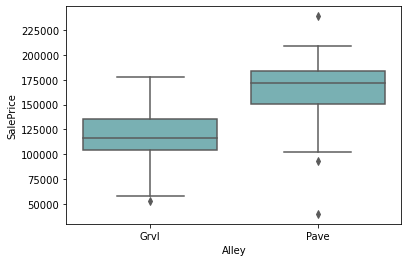

In [42]:
sns.boxplot(x=categorical_df.Alley, y=categorical_df.SalePrice, color='#6fb9bd')

In [43]:
def plot_countplot(df, column_name, ax=None):
    _df = df[[column_name]].copy()
    if len(_df[_df[column_name].isnull()]):
        _df.fillna('NaN', inplace=True)
    
    color = '#42b0f5' if ax != None else '#7661ff'
    sns.countplot(x=column_name, data=_df, color=color, alpha=.7, ax=ax)
    del _df

PoolQC cannot be plotted


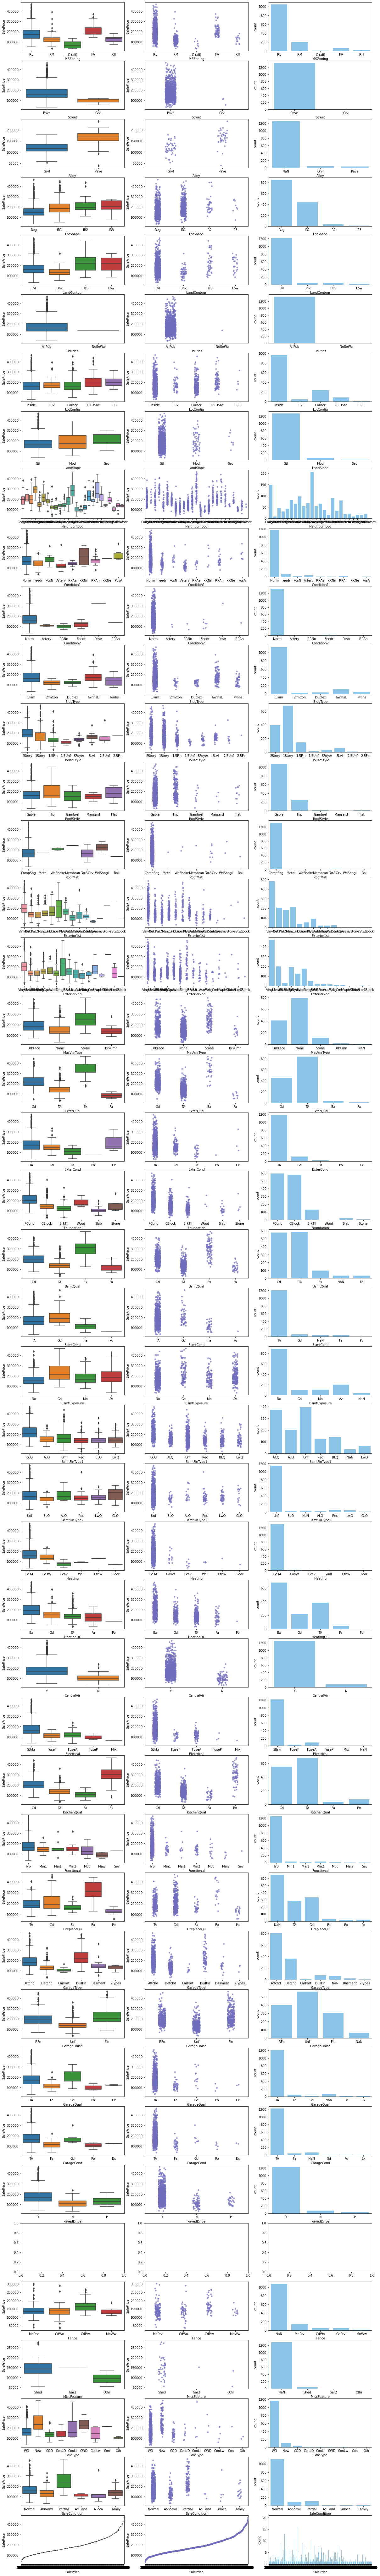

In [44]:
def plot_base_categorical_relation(df, figsize=(20, 150)):
    columns = df.columns.tolist()
    _, axs = plt.subplots(len(columns), 3, figsize=figsize)
    
    for idx, column in enumerate(columns):
        try:
            # To get knowledge about outliers & distribution
            sns.boxplot(x=df[column], y=df['SalePrice'], ax=axs[idx][0])

            # To get its realtion with SalePrice
            sns.stripplot(
                x=column, y='SalePrice', data=df,
                color='#706dbd', alpha=.7, jitter=.1,
                ax=axs[idx][1]
            )

            # To get count plot for `column` (considering NaN, so we can know 
            # how much of data is missing)
            plot_countplot(df, column, axs[idx][2])
        except ValueError:
            # ValueError: min() arg is an empty sequence
            # 
            # The above error happens while creating plot for column `PoolQC` (maybe 
            # because it has NaN value)
            print(f'{column} cannot be plotted')
        
        
plot_base_categorical_relation(categorical_df)

The few columns that are not clear as they have more numbers of category, so plotting them separately

In [45]:
def plot_base_categorical_realtion_for_column(df, column_name, figsize=(20, 20)):
    _, ax = plt.subplots(3, 1, figsize=figsize)
    # To get knowledge about outliers & distribution
    sns.boxplot(x=df[column_name], y=df['SalePrice'], ax=ax[0])

    # To get its realtion with SalePrice
    sns.stripplot(
        x=column_name, y='SalePrice', data=df,
        color='#706dbd', alpha=.7, jitter=.2,
        ax=ax[1]
    )

    # To get count plot for `column` (considering NaN, so we can know 
    # how much of data is missing)
    plot_countplot(df, column_name, ax[2])

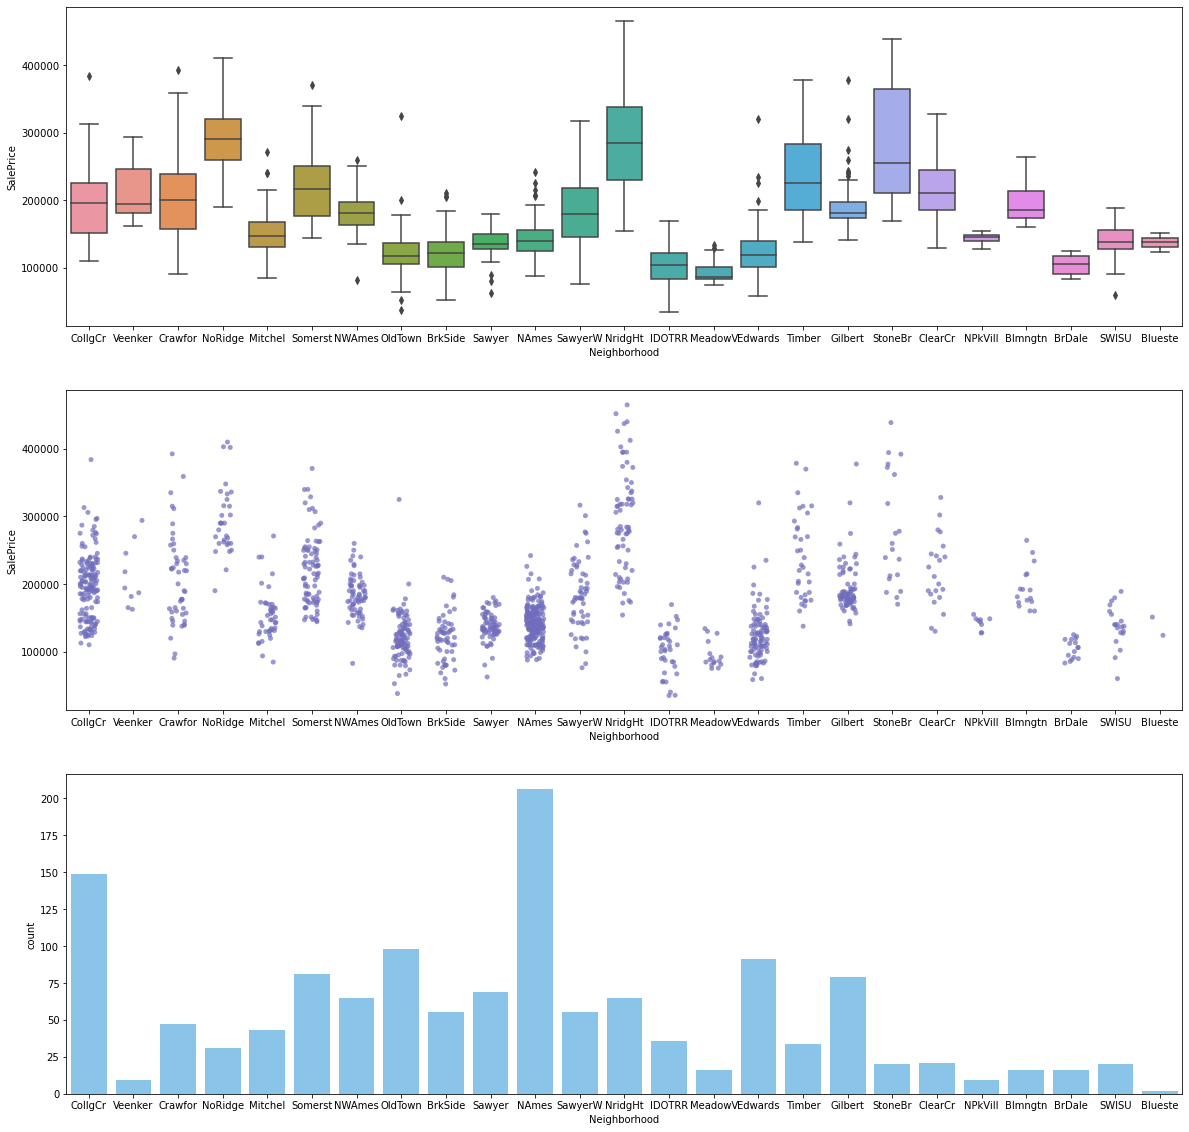

In [46]:
plot_base_categorical_realtion_for_column(categorical_df, 'Neighborhood')

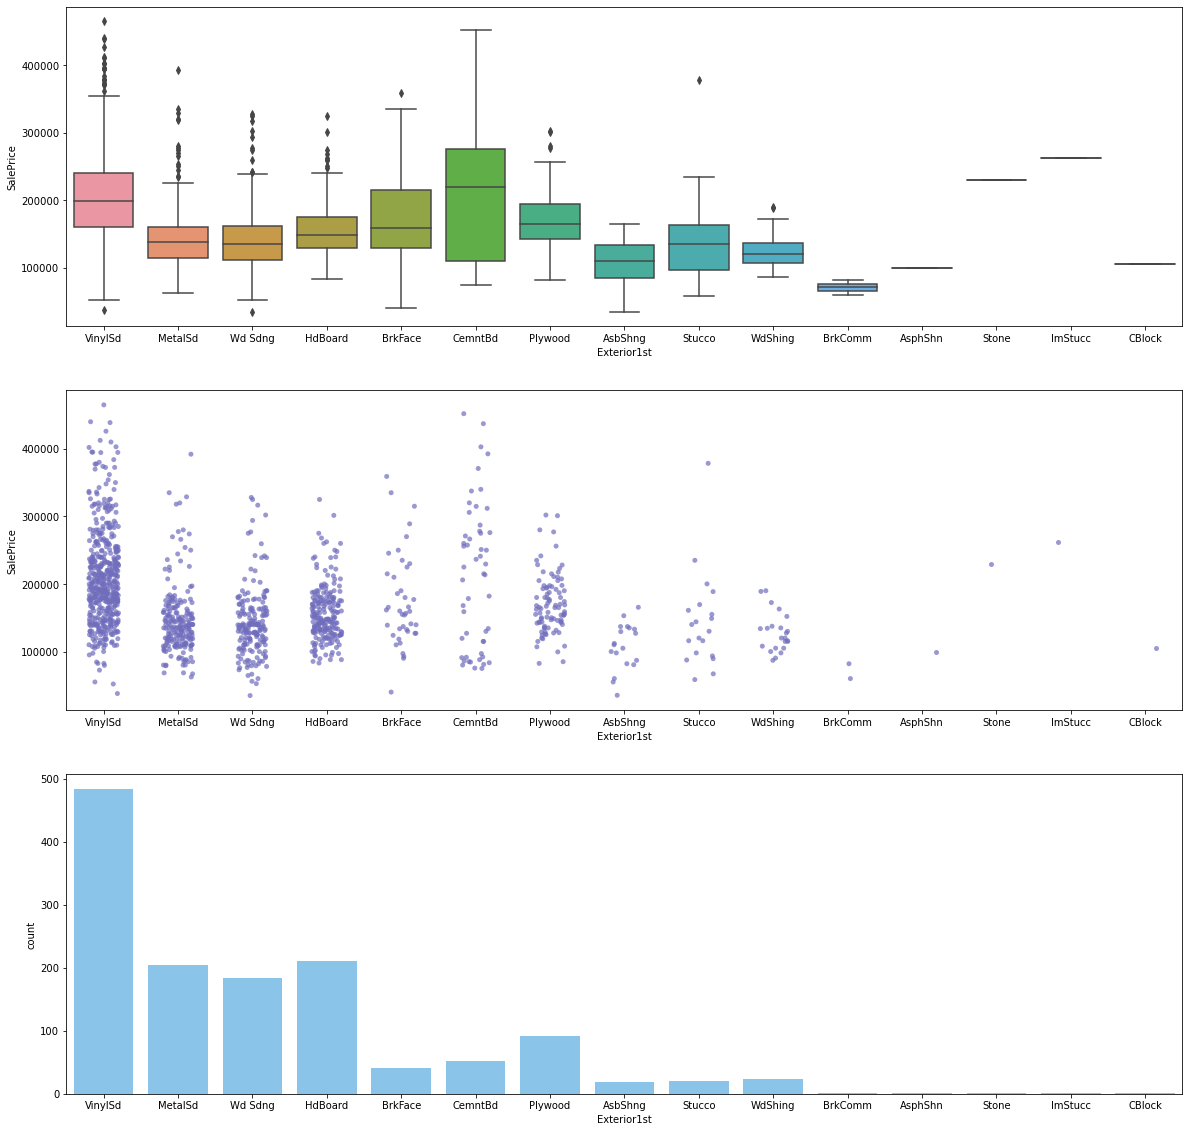

In [47]:
plot_base_categorical_realtion_for_column(categorical_df, 'Exterior1st')

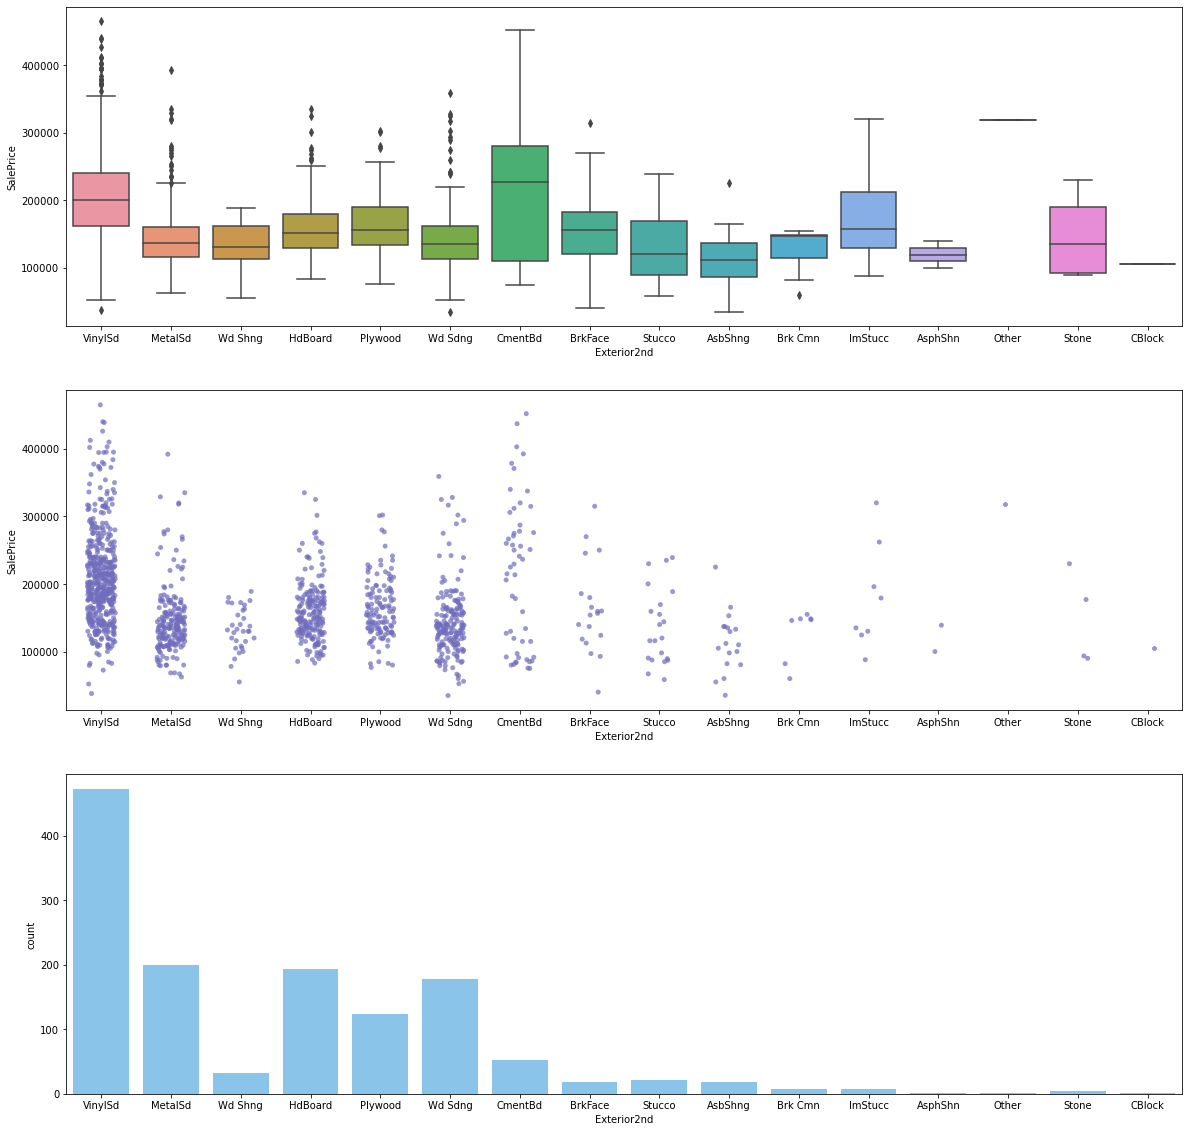

In [48]:
plot_base_categorical_realtion_for_column(categorical_df, 'Exterior2nd')

Solving the problem of `NaN` aka missing values

In [49]:
nan_columns = get_nan_columns(categorical_df)
print(f'Columns that contains NaN values: {nan_columns}\n')

categorical_df[nan_columns].info()

Columns that contains NaN values: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         81 non-null     object
 1   MasVnrType    1326 non-null   object
 2   BsmtQual      1298 non-null   object
 3   BsmtCond      1298 non-null   object
 4   BsmtExposure  1297 non-null   object
 5   BsmtFinType1  1298 non-null   object
 6   BsmtFinType2  1297 non-null   object
 7   Electrical    1332 non-null   object
 8   FireplaceQu   682 non-null    object
 9   GarageType    1268 non-null   object
 10  GarageFinish  1268 non-null   object
 11  GarageQual    1268 non-null   object
 12  GarageCond    1268 non-null   object
 13  PoolQC

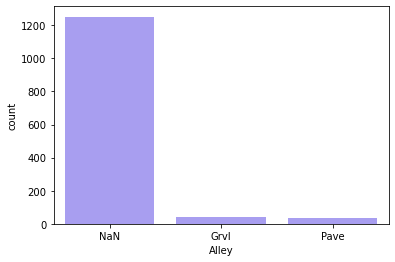

In [50]:
# Alley
plot_countplot(categorical_df, 'Alley')
drop_df_column(categorical_df, 'Alley')

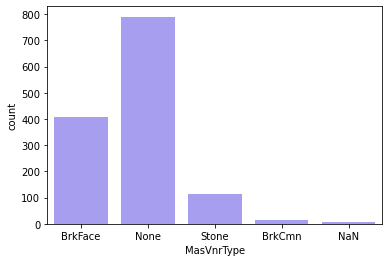

In [51]:
# MasVnrType
plot_countplot(categorical_df, 'MasVnrType')

# Here majority of `MasVnrType` are None so replacing NaN with None
categorical_df.MasVnrType.fillna('None', inplace=True)

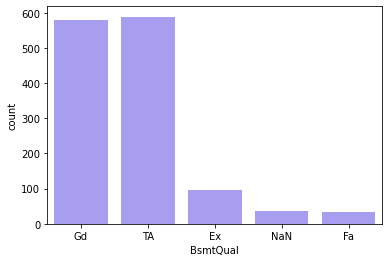

In [52]:
# BsmtQual
plot_countplot(categorical_df, 'BsmtQual')

# Here majority of `BsmtQual` are TA or Gd so replacing NaN with TA (since, its more than Gd)
categorical_df.BsmtQual.fillna('TA', inplace=True)

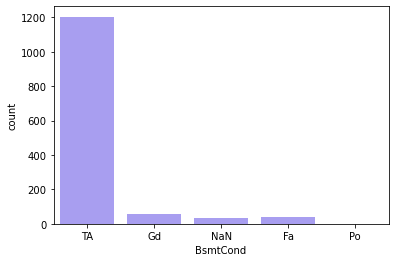

In [53]:
# BsmtCond
plot_countplot(categorical_df, 'BsmtCond')

# Here majority of `BsmtCond` is TA, so replacing NaN with TA
# categorical_df.BsmtCond.fillna('TA', inplace=True)

# But since majority(approx. more than 80%) of the data point has value as TA
# which is not useful, so dropping this column
drop_df_column(categorical_df, 'BsmtCond')

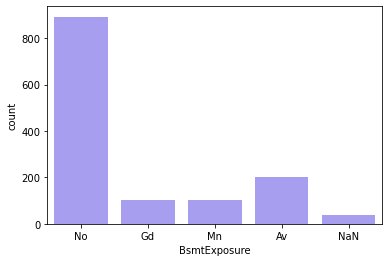

In [54]:
# BsmtExposure
plot_countplot(categorical_df, 'BsmtExposure')

# Here majority of `BsmtExposure` is No, so replacing NaN with No
categorical_df.BsmtExposure.fillna('No', inplace=True)
# Here keeping the column (& not dropping it) since other values are in 
# some significant number

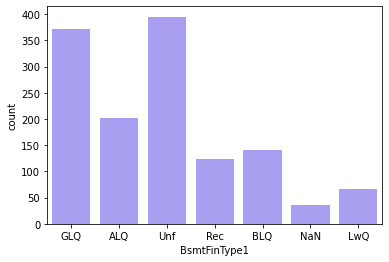

In [55]:
# BsmtFinType1
plot_countplot(categorical_df, 'BsmtFinType1')

# Here majority of `BsmtFinType1` is Unf, so replacing NaN with Unf
categorical_df.BsmtFinType1.fillna('Unf', inplace=True)

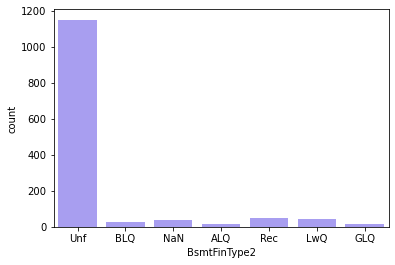

In [56]:
# BsmtFinType2
plot_countplot(categorical_df, 'BsmtFinType2')

# Here majority of `BsmtFinType2` is Unf replacing NaN with Unf

# Here majority(approx. more than 80%) of the data point has value as Unf
# which is not useful, so dropping this column
drop_df_column(categorical_df, 'BsmtFinType2')

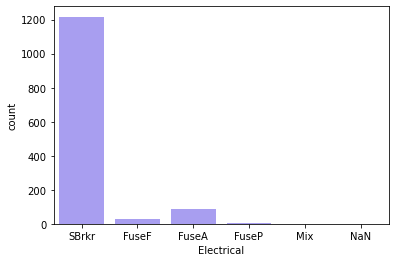

In [57]:
# Electrical
plot_countplot(categorical_df, 'Electrical')

# Here majority(approx. more than 80%) of the data point has value as SBrkr
# which is not useful, so dropping this column
drop_df_column(categorical_df, 'Electrical')

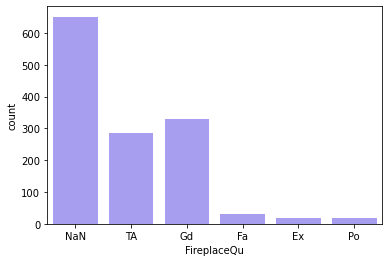

In [58]:
# FireplaceQu
plot_countplot(categorical_df, 'FireplaceQu')

# Here majority of the data is missing & its hard to estimate values for them.
# One way is to randomly give rows TA & Gd, since they are next majority values
# but since a lot of data is missing and just randomly giving them some value is 
# not a good way, so dropping the column
drop_df_column(categorical_df, 'FireplaceQu')

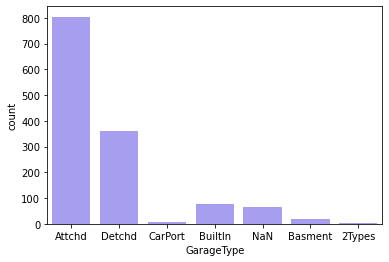

In [59]:
# GarageType
plot_countplot(categorical_df, 'GarageType')

# Here majority of `GarageType` is Attchd, so replacing NaN with Attchd
categorical_df.GarageType.fillna('Attchd', inplace=True)

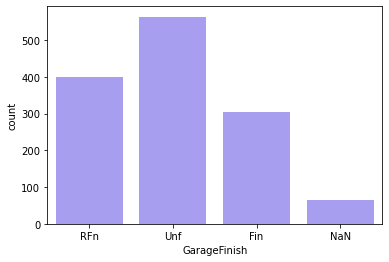

In [60]:
# GarageFinish
plot_countplot(categorical_df, 'GarageFinish')

# Here majority of `GarageFinish` is Unf, so replacing NaN with Unf
categorical_df.GarageFinish.fillna('Unf', inplace=True)

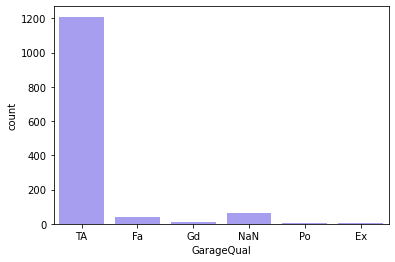

In [61]:
# GarageQual
plot_countplot(categorical_df, 'GarageQual')

# But since majority(approx. more than 80%) of the data point has value as TA
# which is not useful, so dropping this column
drop_df_column(categorical_df, 'GarageQual')

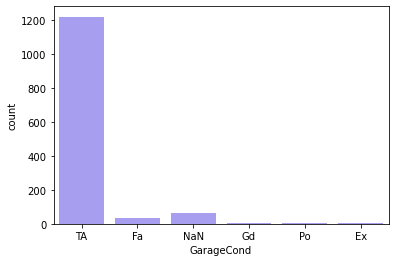

In [62]:
# GarageCond
plot_countplot(categorical_df, 'GarageCond')

# But since majority(approx. more than 80%) of the data point has value as TA
# which is not useful, so dropping this column
drop_df_column(categorical_df, 'GarageCond')

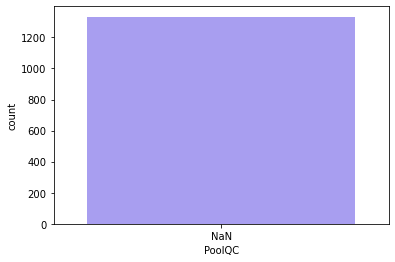

In [63]:
# PoolQC
plot_countplot(categorical_df, 'PoolQC')

# Entire data is missing - (there are some data in orginal `df` but while removing 
# outliers those rows were removed and the resulted `df` didn't had any PoolQC 
# value hence entire remaining data is missing)
drop_df_column(categorical_df, 'PoolQC')

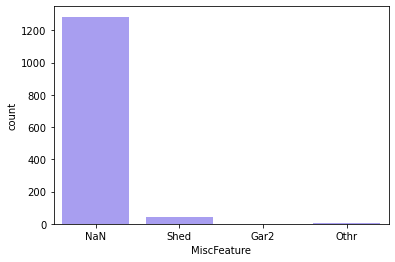

In [64]:
# MiscFeature
plot_countplot(categorical_df, 'MiscFeature')

# Here majority of the data is missing, so dropping the column
drop_df_column(categorical_df, 'MiscFeature')

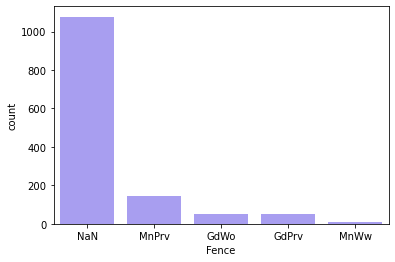

In [65]:
# Fence
plot_countplot(categorical_df, 'Fence')

# Here majority of the data is missing, so dropping the column
drop_df_column(categorical_df, 'Fence')

In [66]:
nan_columns = get_nan_columns(categorical_df)
print(f'Columns that contains NaN values: {nan_columns}\n')

Columns that contains NaN values: []



The missing values problem is solved in `categorical_df` & no rows were removed from `categorical_df` so we don't have to make any changes in `original_y`

## 🧬 Exploratory Data Analysis

![](https://media.giphy.com/media/l2JdZLvehvBjU5pVm/giphy.gif)

Doing `EDA` on `continuous_df` & `categorical_df` separately

### Continuous Variables EDA

In [67]:
continuous_df.sample(5)

OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
966     -0.795680  -1.092550     -1.666526    0.023183 -0.438145  0.024779   
1199    -1.557088  -0.306487     -0.275223    0.316834  0.786729 -0.786031   
682     -0.034272   0.821342      0.588345    1.442086  0.512188 -0.786031   
947      1.488544   1.026402      0.876200    2.174981  1.531910 -0.786031   
1056     0.727136   1.128931      0.972152    0.593212  0.732424 -0.786031   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
966       1.215605 -1.042003  1.322291     -1.163632      0.489692   
1199     -0.822636 -1.042003  1.322291      0.277931     -0.226053   
682       1.215605 -1.042003 -0.756263     -1.163632     -0.226053   
947       1.215605  0.889833 -0.756263      0.277931      1.921182   
1056      1.215605  0.889833 -0.756263     -1.163632     -0.226053   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea    MoSold    YrSold  \
966     2.325101    -1.428338   -1.044373   -1.051000 -0.114292  0.885662   
1199    0.691279    -0.111084    0.367543   -0.015046  1.372067 -1.364504   
682     0.691279     0.741257    0.367543   -0.157936  1.743657  0.135606   
947     0.691279     0.973714    1.779459    1.765980  1.743657 -0.614449   
1056    0.691279     1.089942    0.367543    0.112535 -0.114292 -1.364504   

      SalePrice  
966   -0.208687  
1199  -0.386992  
682   -0.015522  
947    1.425781  
1056   0.175413

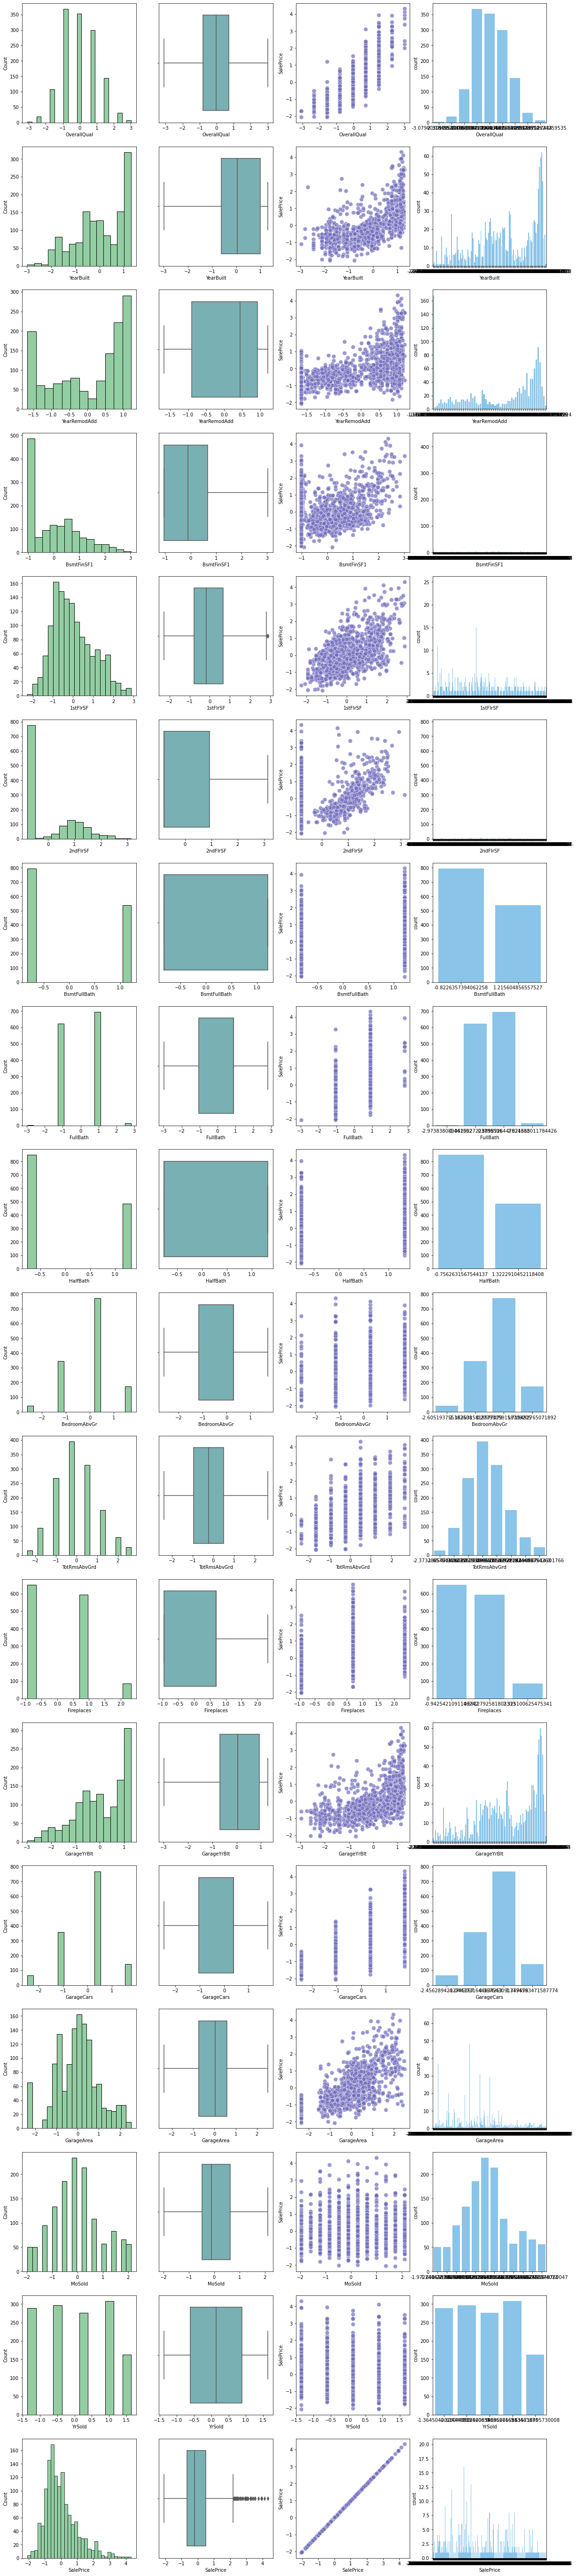

In [68]:
plot_base_relation(continuous_df, figsize=(20, 100))

All the scatter plots shows relations between each column and `SalePrice`

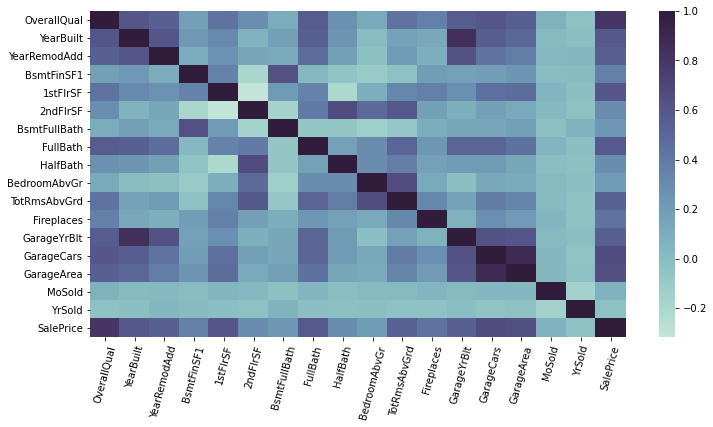

In [69]:
def plot_corr(df):
    # the `corr` method uses pearson correaltion
    corr = df.corr()
    
    _, ax = plt.subplots(1, 1, figsize=(12, 6))
    g = sns.heatmap(corr, ax=ax, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

    for _ax in g.get_xticklabels():
        _ax.set_rotation(75)
    
    
plot_corr(continuous_df)

[Source](https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8) on understanding how to interpret correlations.
<br />
![pearson correaltion](https://miro.medium.com/max/466/1*Qz_gwy4ZaSZuOpl3IyO2HA.png)

In [70]:
def get_corr(data_1, data_2):
    return round(pearsonr(data_1, data_2)[0], 2)
    
    
def get_corr_info_for_df(df):
    columns = df.columns.tolist()
    
    # To keep record of which corr info is displayed & hence
    # not to display opposite corr info 
    # eg. if a - b is display then b - a will not be displayed
    # since they will have same result
    displayed = []
    def is_displayed(main_column, secondary_column, displayed_list):
        return any([
            True for tup in displayed_list if 
            (tup[0] == main_column and tup[1] == secondary_column) 
            or 
            (tup[1] == main_column and tup[0] == secondary_column)
        ])

    
    # main column is the one for which we'll find all the corr info
    # related to secondary column
    for main_column in columns:
        for secondary_column in columns:
            if secondary_column != main_column and not is_displayed(main_column, secondary_column, displayed):
                corr = get_corr(df[main_column], df[secondary_column])
                if corr >= .7 or corr <= -.7:
                    # print only if pearson correlation is high (.7 to .9) or very high (.9 to 1)
                    print(f'{secondary_column} - {main_column}: {corr}')
                    displayed.append((main_column, secondary_column))
                    
                    
get_corr_info_for_df(continuous_df)

SalePrice - OverallQual: 0.81
GarageYrBlt - YearBuilt: 0.85
GarageArea - GarageCars: 0.89


`SalePrice` has high correlation `(0.81)` with `OverallQual` <br />
`GarageYrBlt` has high correlation `(0.85)` with `YearBuilt` <br />
`GarageArea` has high correlation `(0.89)` with `GarageCars`

In [71]:
# def is_displayed(main_column, secondary_column, displayed_list):
#     return any([
#         True for tup in displayed_list if 
#         (tup[0] == main_column and tup[1] == secondary_column) 
#         or 
#         (tup[1] == main_column and tup[0] == secondary_column)
#     ])

# is_displayed('a', 'b', [('a', 'b')])

### Categorical Variables EDA

In [72]:
categorical_df.sample(5)

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
1401       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
753        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
981        RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
1157       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
622        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
1401      Gilbert       Norm       Norm     1Fam     2Story     Gable   
753       NridgHt       Norm       Norm     1Fam     2Story     Gable   
981       NoRidge       Norm       Norm     1Fam     2Story       Hip   
1157      NridgHt       Norm       Norm    Twnhs     1Story     Gable   
622        Sawyer       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
1401  CompShg     VinylSd     VinylSd       None        TA        TA   
753   CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
981   CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1157  CompShg     VinylSd     VinylSd      Stone        Gd        TA   
622   CompShg     Plywood     Plywood    BrkFace        TA        TA   

     Foundation BsmtQual BsmtExposure BsmtFinType1 Heating HeatingQC  \
1401      PConc       TA           No          GLQ    GasA        Ex   
753       PConc       Gd           Mn          Unf    GasA        Gd   
981       PConc       Gd           No          GLQ    GasA        Ex   
1157      PConc       Gd           No          GLQ    GasA        Ex   
622      CBlock       TA           No          BLQ    GasA        TA   

     CentralAir KitchenQual Functional GarageType GarageFinish PavedDrive  \
1401          Y          TA        Typ     Attchd          Fin          Y   
753           Y          Ex        Typ     Attchd          RFn          Y   
981           Y          Gd        Typ     Attchd          Fin          Y   
1157          Y          Gd        Typ     Attchd          RFn          Y   
622           Y          TA        Typ     Detchd          Unf          Y   

     SaleType SaleCondition  SalePrice  
1401       WD        Normal     193000  
753        WD        Normal     275500  
981        WD        Normal     336000  
1157       WD        Normal     230000  
622        WD        Normal     135000

In [73]:
# scaling the price column
# categorical_df.SalePrice = StandardScaler().fit_transform(categorical_df.SalePrice.values[:, np.newaxis])
# categorical_df[['SalePrice']].sample(5)

# Not needed

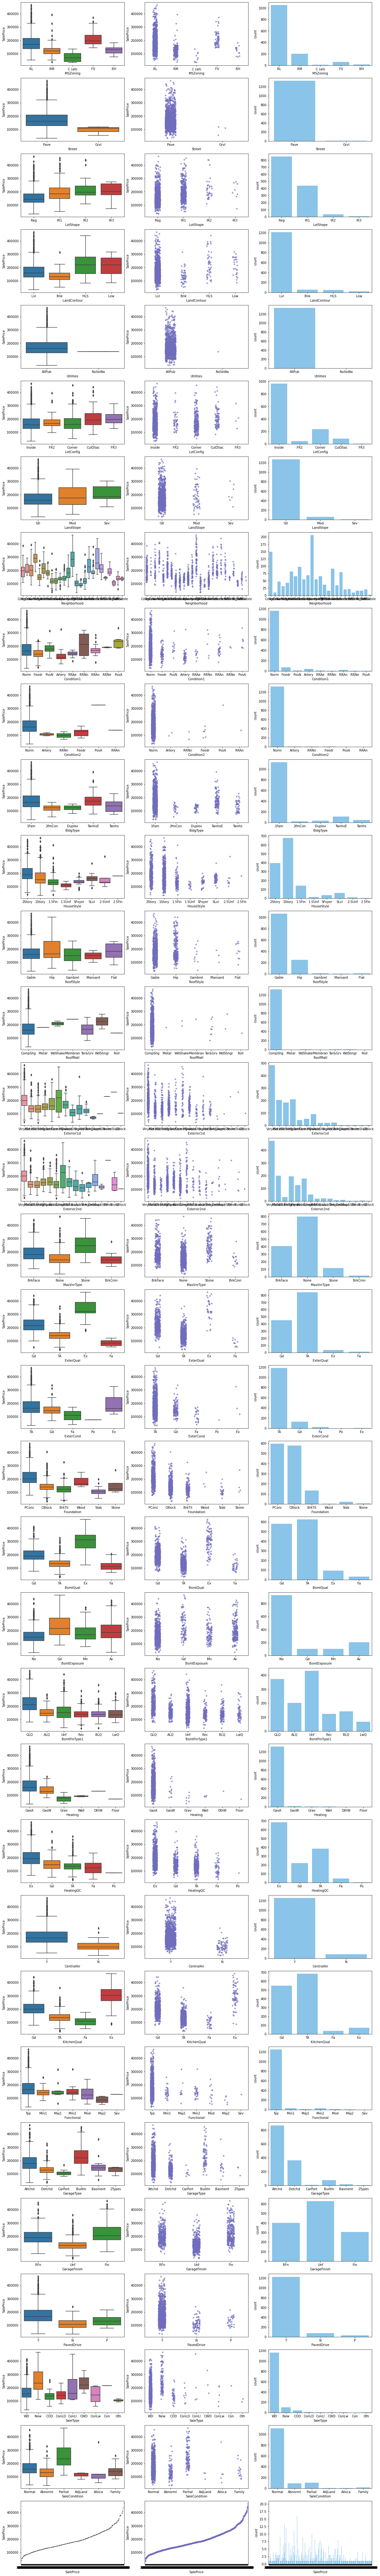

In [74]:
plot_base_categorical_relation(categorical_df)

[Source_01](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365), [Source_02](https://stackoverflow.com/questions/44694228/how-to-check-for-correlation-among-continuous-and-categorical-variables-in-python) and [Source_03](https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable/124618#124618) to understand how to measure correlation between categorical and continuous variables.

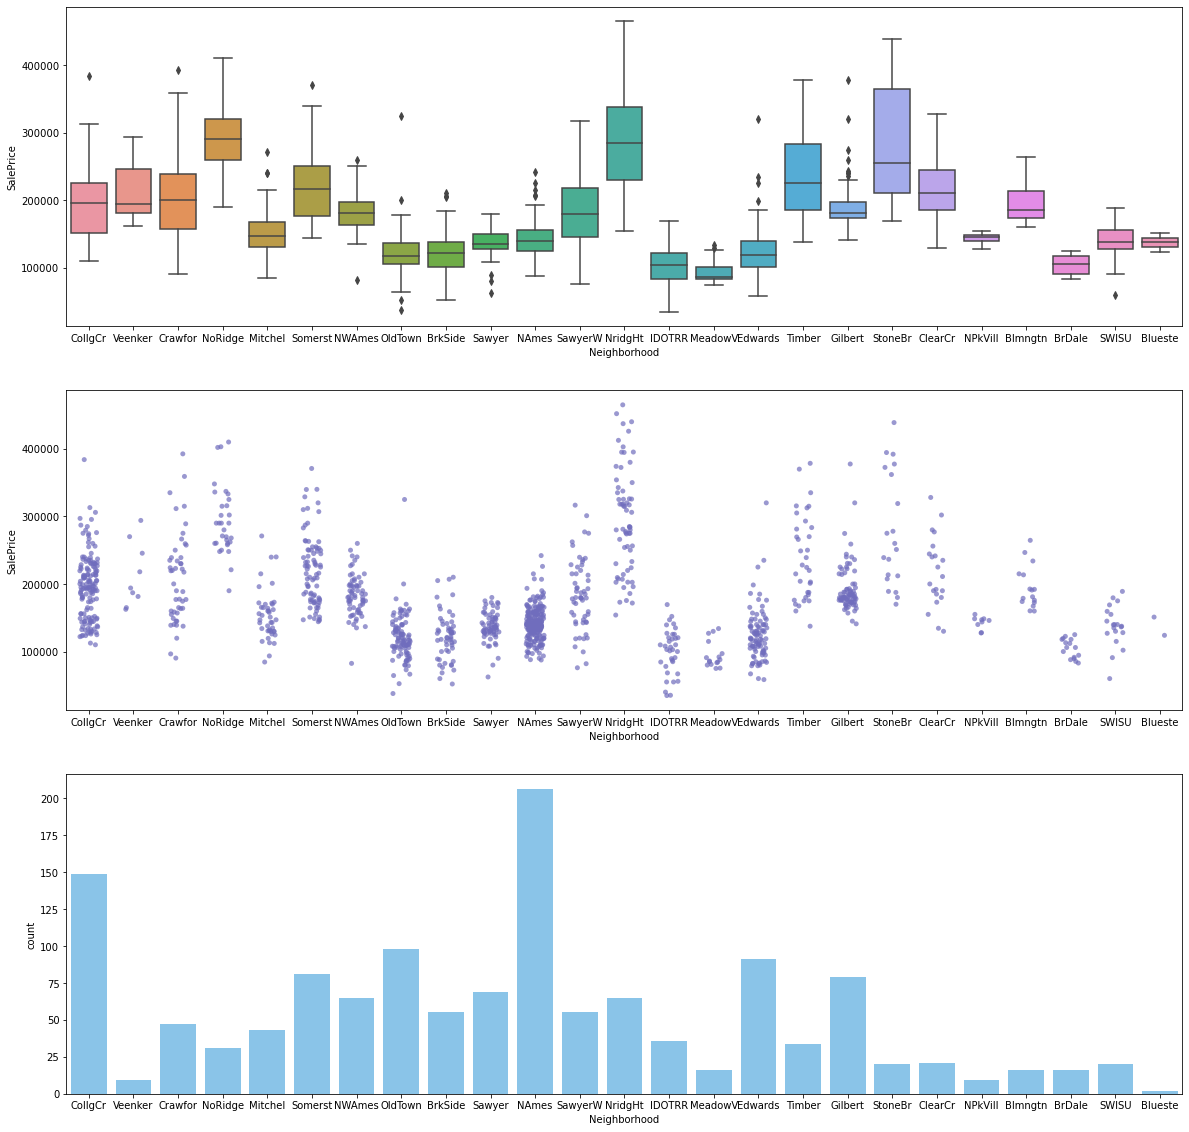

In [75]:
plot_base_categorical_realtion_for_column(categorical_df, 'Neighborhood')

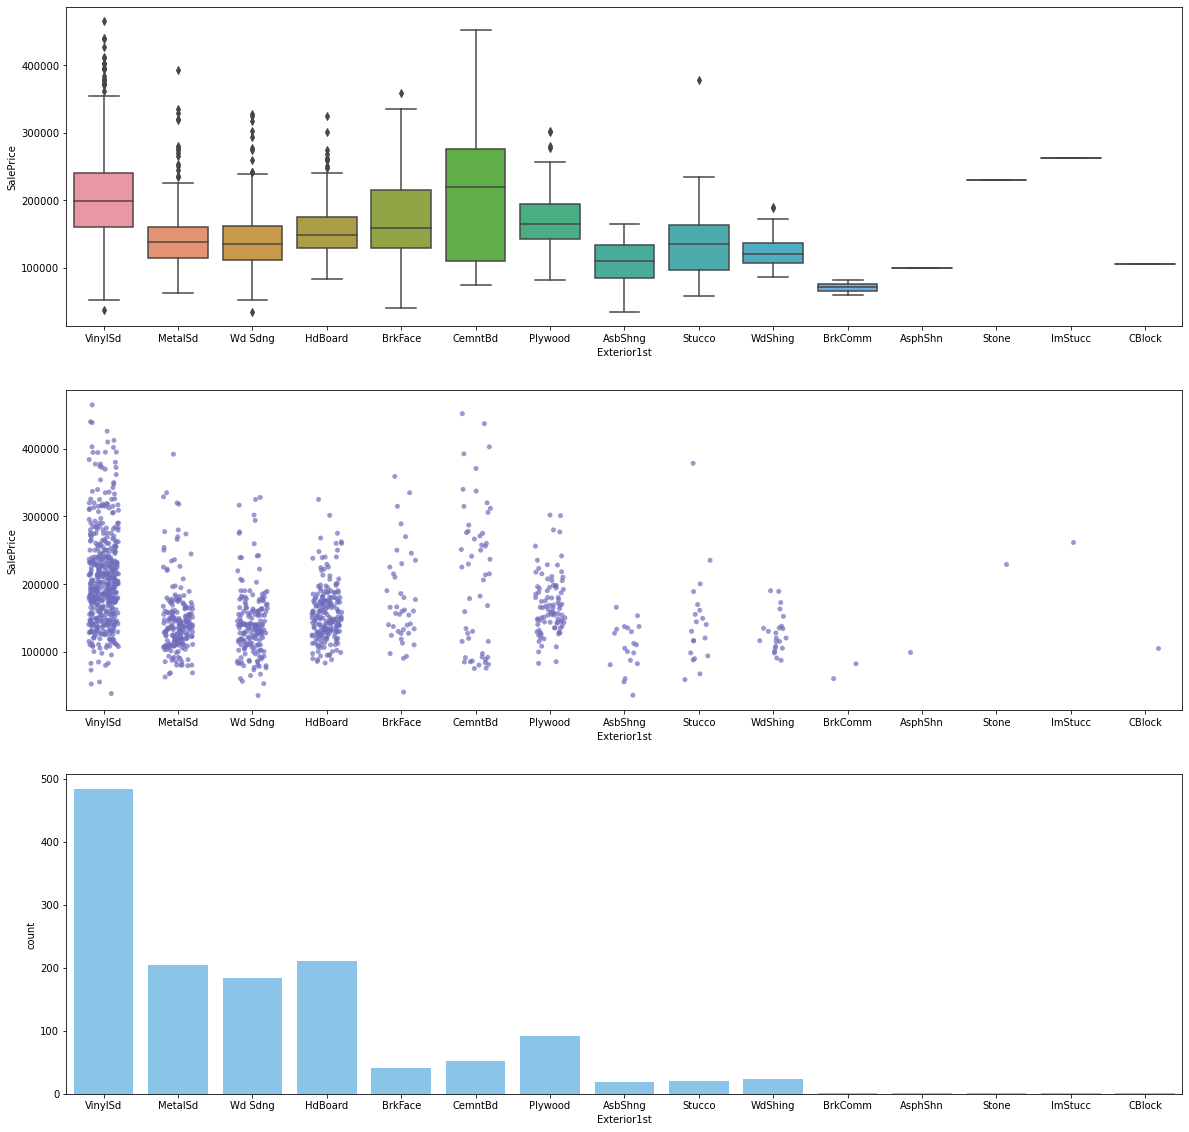

In [76]:
plot_base_categorical_realtion_for_column(categorical_df, 'Exterior1st')

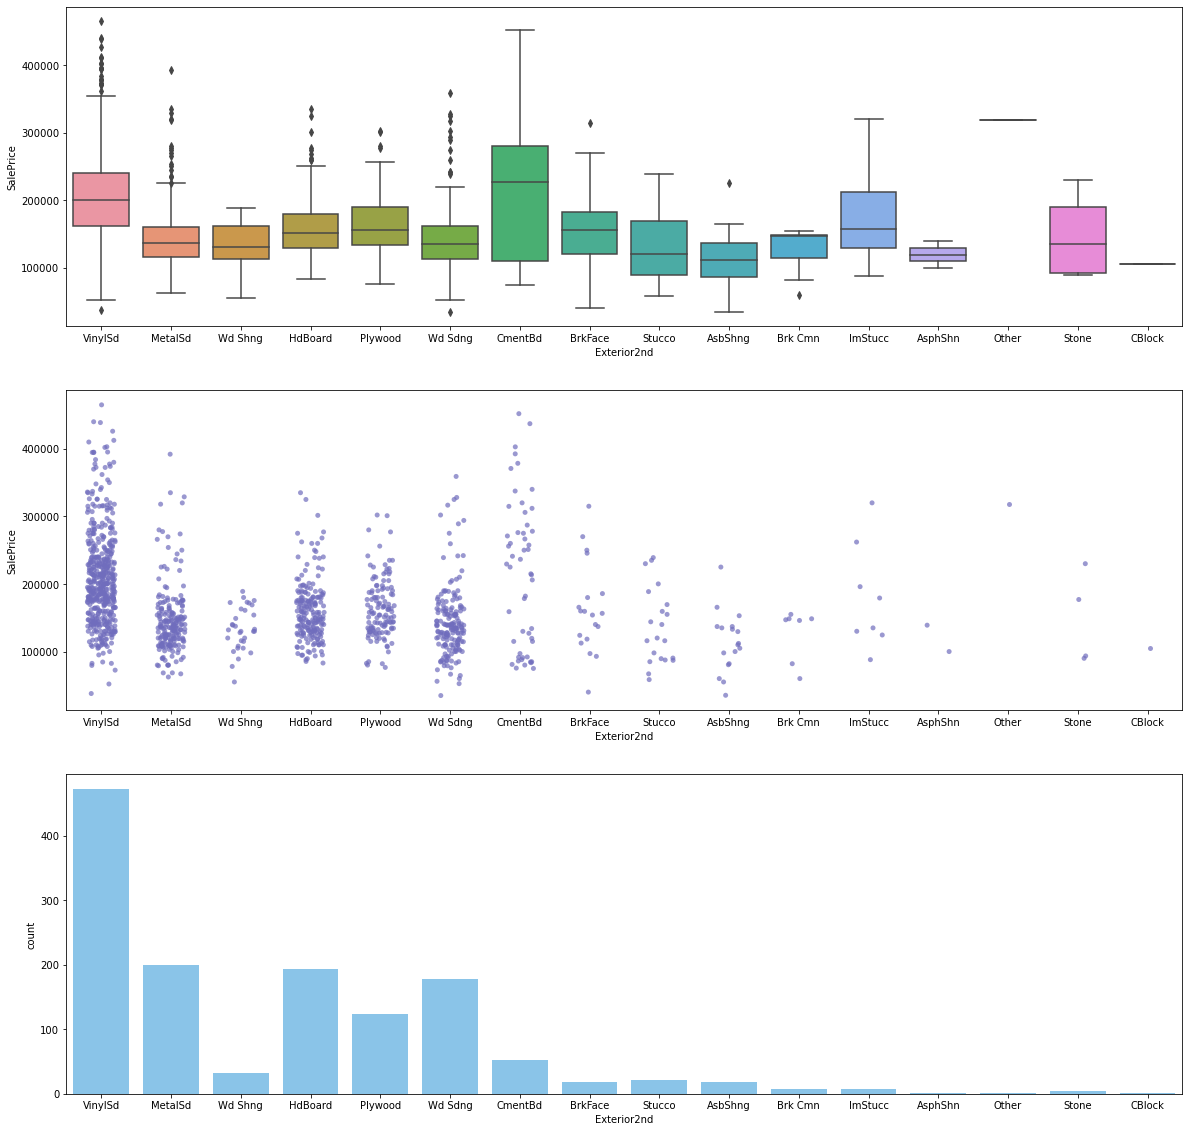

In [77]:
plot_base_categorical_realtion_for_column(categorical_df, 'Exterior2nd')

In [78]:
get_column_names(categorical_df)

MSZoning | Street | LotShape | LandContour | Utilities | LotConfig | LandSlope | Neighborhood | Condition1 | Condition2 | BldgType | HouseStyle | RoofStyle | RoofMatl | Exterior1st | Exterior2nd | MasVnrType | ExterQual | ExterCond | Foundation | BsmtQual | BsmtExposure | BsmtFinType1 | Heating | HeatingQC | CentralAir | KitchenQual | Functional | GarageType | GarageFinish | PavedDrive | SaleType | SaleCondition | SalePrice | 

In [79]:
# Categorical variable column correlation with one continuous variable column
def cat_corr_with_one_cont_column(df, column_name, cont_column_name='SalePrice', ax=None):
    _, ax = plt.subplots(1, 2, figsize=(20, 4))
    
    # Correlation plot
    dummies = pd.concat(
        [pd.get_dummies(df[column_name]), df[cont_column_name]],
        axis='columns'
    )
    corr = dummies.corr()[[cont_column_name]].sort_values(by=cont_column_name, ascending=False)
    sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax[0])
    ax[0].set_title(column_name)
    
    # Box plot
    sns.barplot(x=column_name, y=cont_column_name, data=df, palette='rocket', ax=ax[1])
    ax[1].set_title(column_name)

In [80]:
def update_categorical_with_numeric_values(df, column_name, new_values):
    # In new values, rank the categorical value with its influence on 
    # `SalePrice`. eg. if a has less influence on SalePrice than b then 
    # new_value = {
    #   'a': 0,
    #   'b': 1
    # }
    # a => 0 since it has less influence than b => 1
    
    df[column_name] = df[column_name].apply(lambda current_value: new_values[current_value])

In [81]:
# creating a one hot encoded df before chaning values & later will join 
# both of them with `continuous_df` and do modelling on both the datasets

def onehotencode_categorical_df(df):
    columns = df.columns.tolist()
    dummies = pd.DataFrame()
    
    for column in columns:
        if column != 'SalePrice':
            dummies = pd.concat(
                [dummies, pd.get_dummies(df[column])],
                axis='columns'
            )
        else:
            dummies = pd.concat([dummies, df[column]], axis='columns')

    return dummies

categorical_dummies_df = onehotencode_categorical_df(categorical_df)
categorical_dummies_df.sample(5)

C (all)  FV  RH  RL  RM  Grvl  Pave  IR1  IR2  IR3  Reg  Bnk  HLS  Low  \
1167        0   0   0   1   0     0     1    1    0    0    0    0    0    0   
200         0   0   0   0   1     0     1    0    0    0    1    0    0    0   
234         0   0   0   1   0     0     1    0    0    0    1    0    0    0   
828         0   0   0   1   0     0     1    0    1    0    0    0    0    1   
536         0   0   0   1   0     0     1    1    0    0    0    0    0    0   

      Lvl  AllPub  NoSeWa  Corner  CulDSac  FR2  FR3  Inside  Gtl  Mod  Sev  \
1167    1       1       0       0        0    0    0       1    1    0    0   
200     1       1       0       1        0    0    0       0    1    0    0   
234     1       1       0       0        0    0    0       1    1    0    0   
828     0       1       0       0        1    0    0       0    0    0    1   
536     1       1       0       0        1    0    0       0    1    0    0   

      Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  \
1167        0        0       0        0        0        0        0        0   
200         0        0       0        0        0        0        0        1   
234         0        0       0        0        0        0        0        0   
828         0        0       0        0        1        0        0        0   
536         0        0       0        0        0        1        0        0   

      Gilbert  IDOTRR  MeadowV  Mitchel  NAmes  NPkVill  NWAmes  NoRidge  \
1167        1       0        0        0      0        0       0        0   
200         0       0        0        0      0        0       0        0   
234         1       0        0        0      0        0       0        0   
828         0       0        0        0      0        0       0        0   
536         0       0        0        0      0        0       0        0   

      NridgHt  OldTown  SWISU  Sawyer  SawyerW  Somerst  StoneBr  Timber  \
1167        0        0      0       0        0        0        0       0   
200         0        0      0       0        0        0        0       0   
234         0        0      0       0        0        0        0       0   
828         0        0      0       0        0        0        0       0   
536         0        0      0       0        0        0        0       0   

      Veenker  Artery  Feedr  Norm  PosA  PosN  RRAe  RRAn  RRNe  RRNn  \
1167        0       0      0     0     0     0     0     1     0     0   
200         0       0      0     1     0     0     0     0     0     0   
234         0       0      0     1     0     0     0     0     0     0   
828         0       0      0     1     0     0     0     0     0     0   
536         0       0      0     1     0     0     0     0     0     0   

      Artery  Feedr  Norm  PosA  RRAn  RRNn  1Fam  2fmCon  Duplex  Twnhs  \
1167       0      0     1     0     0     0     1       0       0      0   
200        0      0     1     0     0     0     1       0       0      0   
234        0      0     1     0     0     0     1       0       0      0   
828        0      0     1     0     0     0     1       0       0      0   
536        0      0     1     0     0     0     1       0       0      0   

      TwnhsE  1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl  \
1167       0       0       0       0       0       0       1       0     0   
200        0       0       0       1       0       0       0       0     0   
234        0       0       0       0       0       0       1       0     0   
828        0       0       0       0       0       0       1       0     0   
536        0       0       0       0       0       0       1       0     0   

      Flat  Gable  Gambrel  Hip  Mansard  CompShg  Membran  Metal  Roll  \
1167     0      1        0    0        0        1        0      0     0   
200      0      1        0    0        0        1        0      0     0   
234      0      1        0    0        0        1        0      0

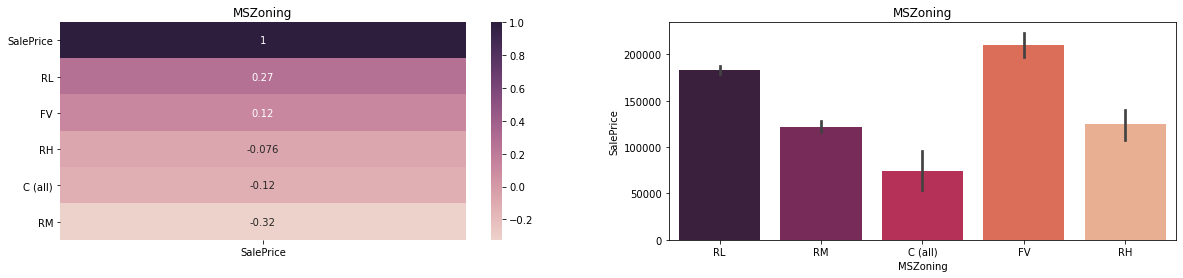

In [82]:
cat_corr_with_one_cont_column(categorical_df, 'MSZoning')

# Ranking 
new_values = {
    'FV': 4,
    'RL': 3,
    'RH': 2,
    'RM': 1,
    'C (all)': 0
}
update_categorical_with_numeric_values(categorical_df, 'MSZoning', new_values)

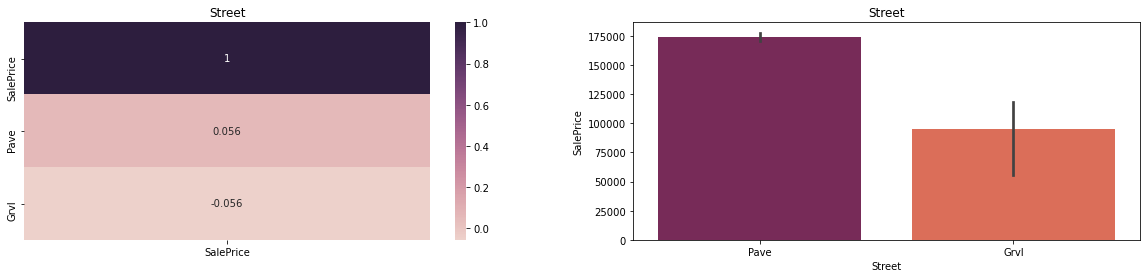

In [83]:
cat_corr_with_one_cont_column(categorical_df, 'Street')
# since it has a very low correlation with SalePrice, so dropping it
drop_df_column(categorical_df, 'Street')

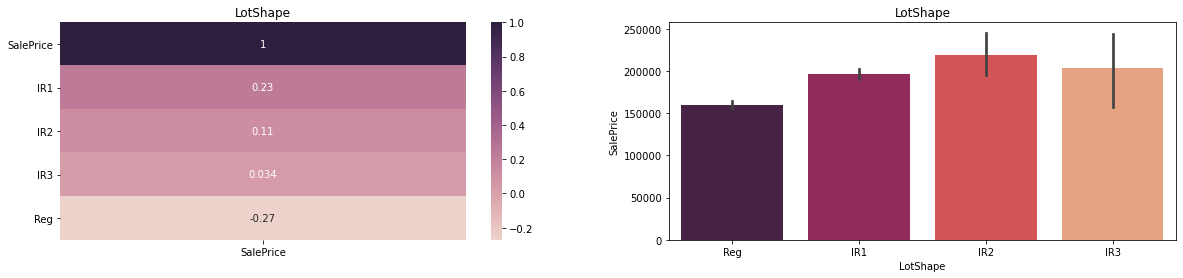

In [84]:
cat_corr_with_one_cont_column(categorical_df, 'LotShape')

new_values = {
    'IR2': 3,
    'IR1': 2,
    'IR3': 1,
    'Reg': 0
}
update_categorical_with_numeric_values(categorical_df, 'LotShape', new_values)

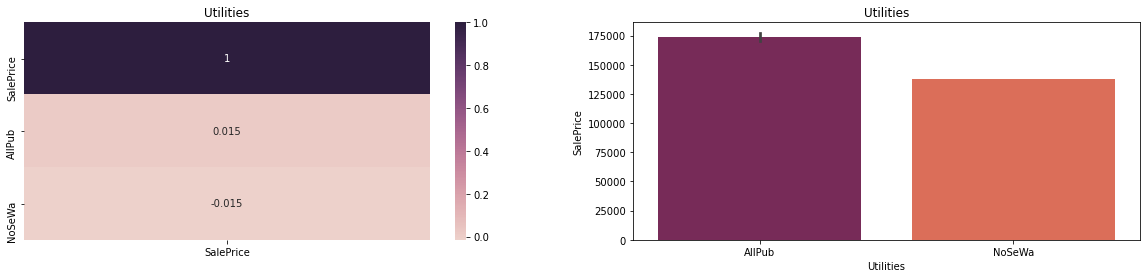

In [85]:
cat_corr_with_one_cont_column(categorical_df, 'Utilities')
# since it has a very low correlation with SalePrice, so dropping it
drop_df_column(categorical_df, 'Utilities')

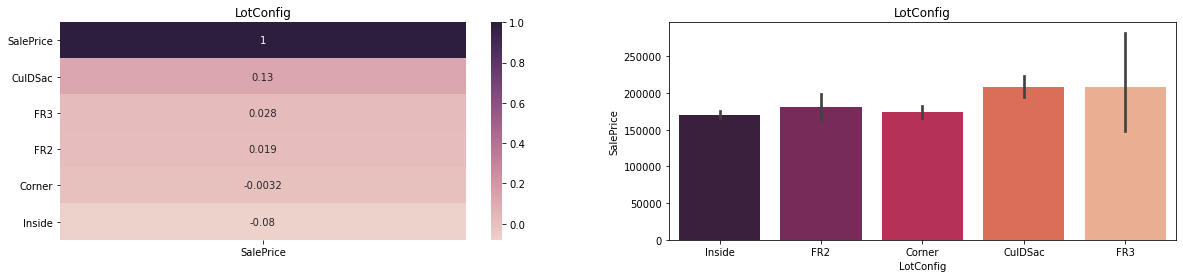

In [86]:
cat_corr_with_one_cont_column(categorical_df, 'LotConfig')
# since it has a very low correlation with SalePrice, so dropping it
drop_df_column(categorical_df, 'LotConfig')

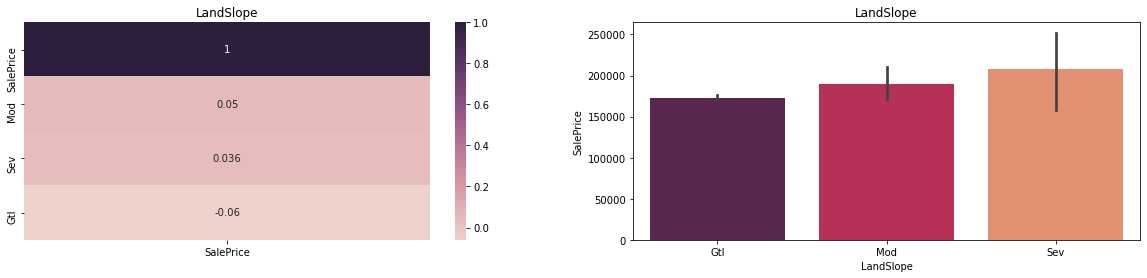

In [87]:
cat_corr_with_one_cont_column(categorical_df, 'LandSlope')
# since it has a very low correlation with SalePrice, so dropping it
drop_df_column(categorical_df, 'LandSlope')

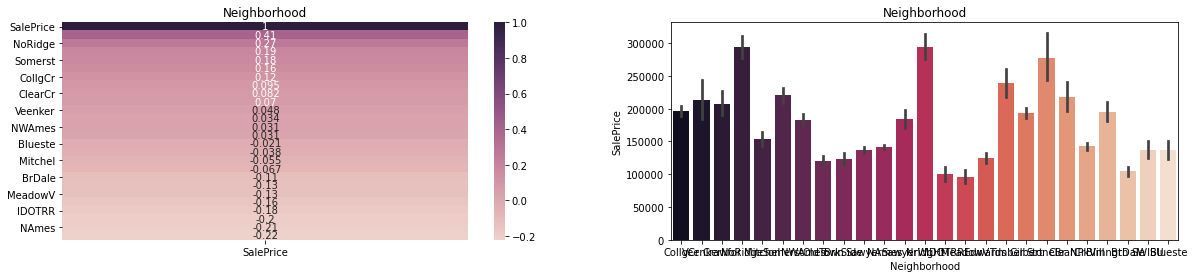

In [88]:
cat_corr_with_one_cont_column(categorical_df, 'Neighborhood')

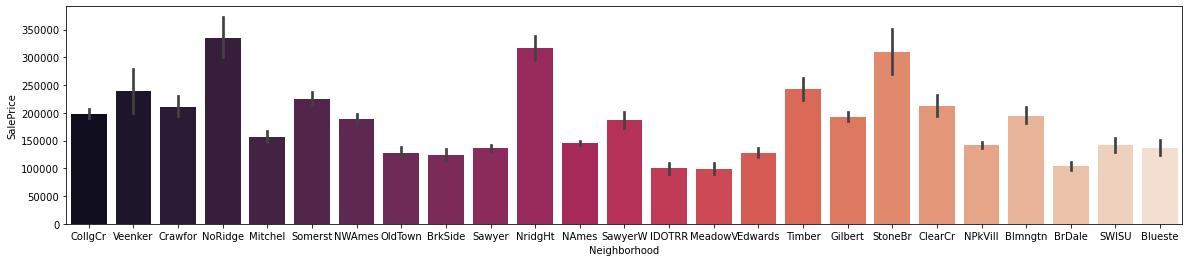

In [89]:
_, ax = plt.subplots(figsize=(20, 4))
sns.barplot(x='Neighborhood', y='SalePrice', data=df, palette='rocket', ax=ax)

new_values = {
    'BrDale': 0,
    'IDOTRR': 1,
    'MeadowV': 2,
    'BrkSide': 3,
    'Edwards': 4,
    'OldTown': 5,
    'Sawyer': 6,
    'NAmes': 7,
    'Blueste': 7,
    'SWISU': 8,
    'NPkVill': 9,
    'Mitchel': 10,
    'NWAmes': 11,
    'Gilbert': 11,
    'Blmngtn': 11,
    'SawyerW': 11,
    'ClearCr': 12,
    'CollgCr': 12,
    'Crawfor': 13,
    'Somerst': 12,
    'Veenker': 13,
    'Timber': 14,
    'StoneBr': 15,
    'NridgHt': 16,
    'NoRidge': 17
}
update_categorical_with_numeric_values(categorical_df, 'Neighborhood', new_values)

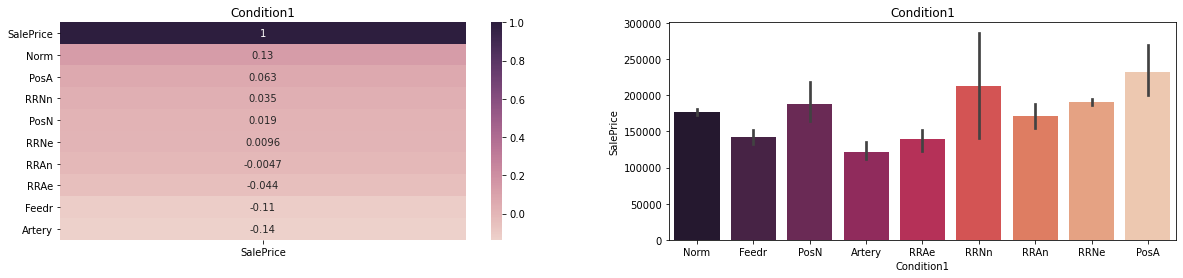

In [90]:
cat_corr_with_one_cont_column(categorical_df, 'Condition1')
drop_df_column(categorical_df, 'Condition1')

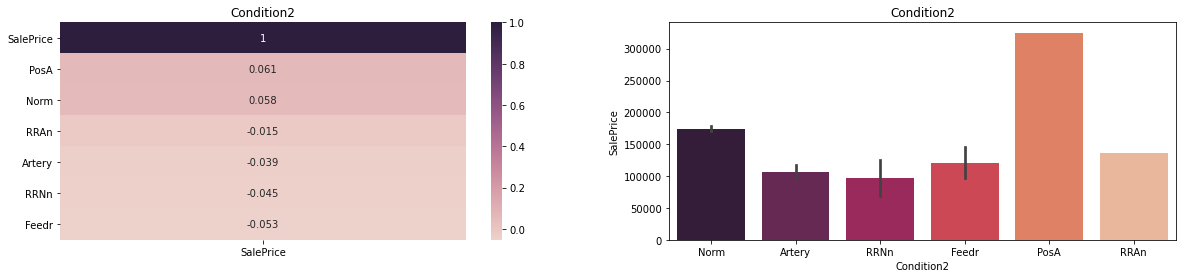

In [91]:
cat_corr_with_one_cont_column(categorical_df, 'Condition2')
drop_df_column(categorical_df, 'Condition2')

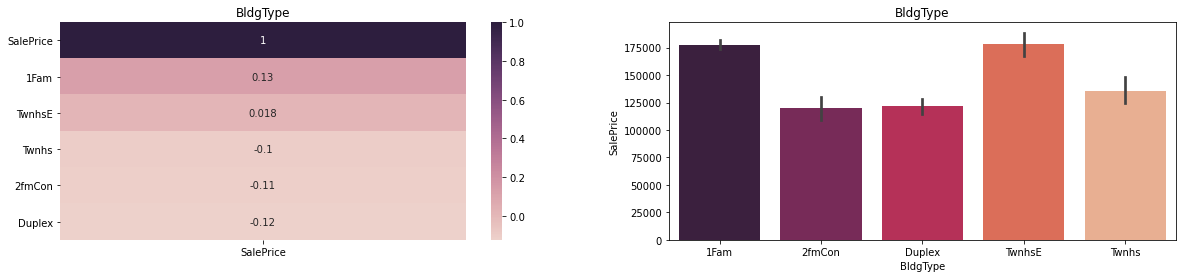

In [92]:
cat_corr_with_one_cont_column(categorical_df, 'BldgType')
drop_df_column(categorical_df, 'BldgType')

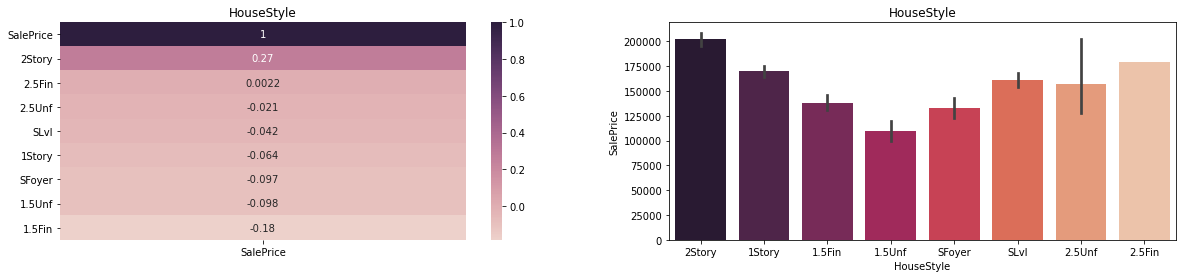

In [93]:
cat_corr_with_one_cont_column(categorical_df, 'HouseStyle')
drop_df_column(categorical_df, 'HouseStyle')

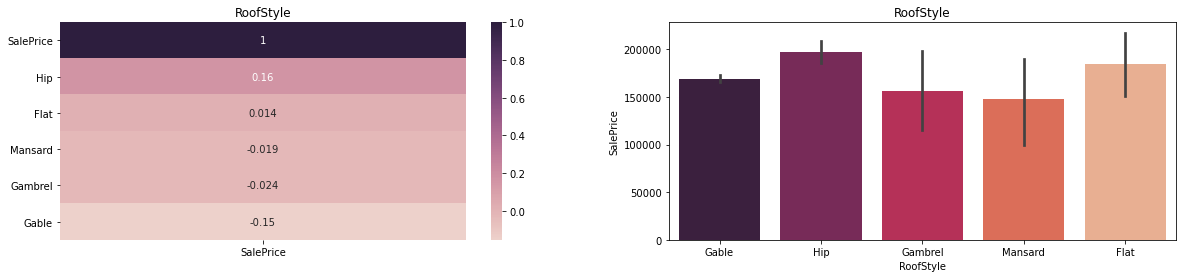

In [94]:
cat_corr_with_one_cont_column(categorical_df, 'RoofStyle')
drop_df_column(categorical_df, 'RoofStyle')

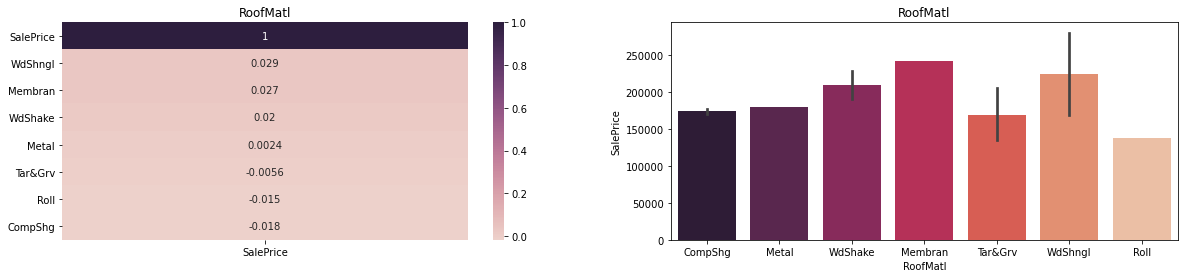

In [95]:
cat_corr_with_one_cont_column(categorical_df, 'RoofMatl')
drop_df_column(categorical_df, 'RoofMatl')

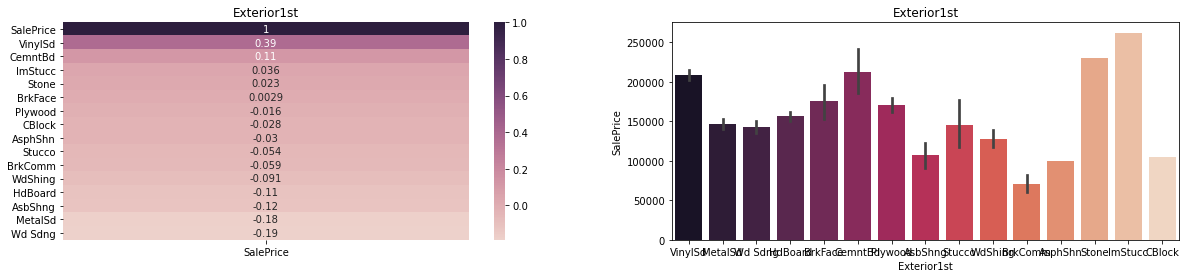

In [96]:
cat_corr_with_one_cont_column(categorical_df, 'Exterior1st')

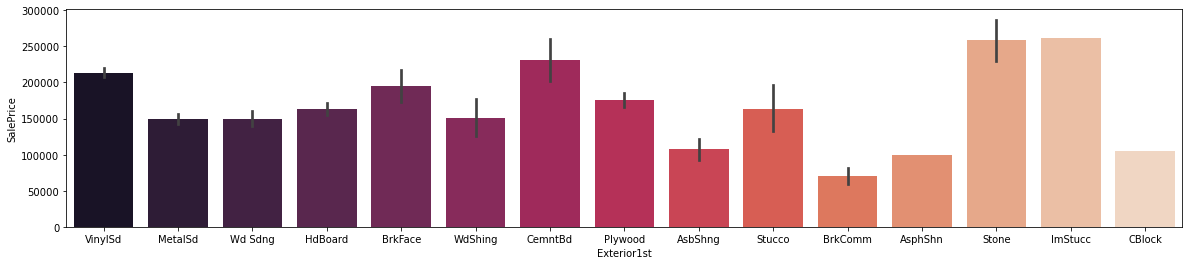

In [97]:
_, ax = plt.subplots(figsize=(20, 4))
sns.barplot(x='Exterior1st', y='SalePrice', data=df, palette='rocket', ax=ax)

new_values = {
    'BrkComm': 0,
    'AsphShn': 1,
    'CBlock': 2,
    'AsbShng': 3,
    'Wd Sdng': 4,
    'MetalSd': 5,
    'WdShing': 6,
    'HdBoard': 7,
    'Stucco': 8,
    'Plywood': 9,
    'BrkFace': 10,
    'VinylSd': 11,
    'CemntBd': 12,
    'Stone': 13,
    'ImStucc': 14
}
update_categorical_with_numeric_values(categorical_df, 'Exterior1st', new_values)

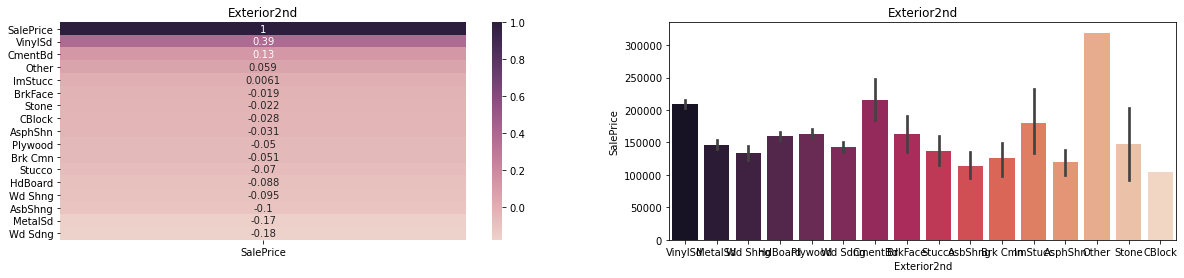

In [98]:
cat_corr_with_one_cont_column(categorical_df, 'Exterior2nd')

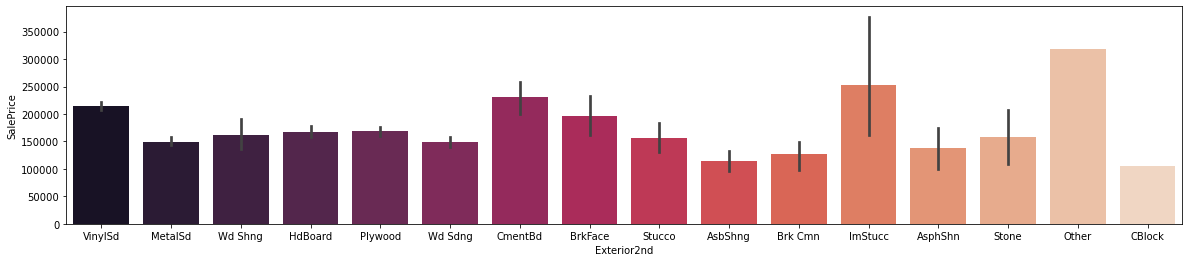

In [99]:
_, ax = plt.subplots(figsize=(20, 4))
sns.barplot(x='Exterior2nd', y='SalePrice', data=df, palette='rocket', ax=ax)

new_values = {
    'CBlock': 0,
    'AsbShng': 1,
    'Brk Cmn': 2,
    'AsphShn': 3,
    'Wd Shng': 4,
    'Stucco': 4,
    'MetalSd': 5,
    'Wd Sdng': 6,
    'HdBoard': 7,
    'Plywood': 8,
    'Stone': 9,
    'BrkFace': 10,
    'VinylSd': 11,
    'CmentBd': 12,
    'ImStucc': 13,
    'Other': 14,
}
update_categorical_with_numeric_values(categorical_df, 'Exterior2nd', new_values)

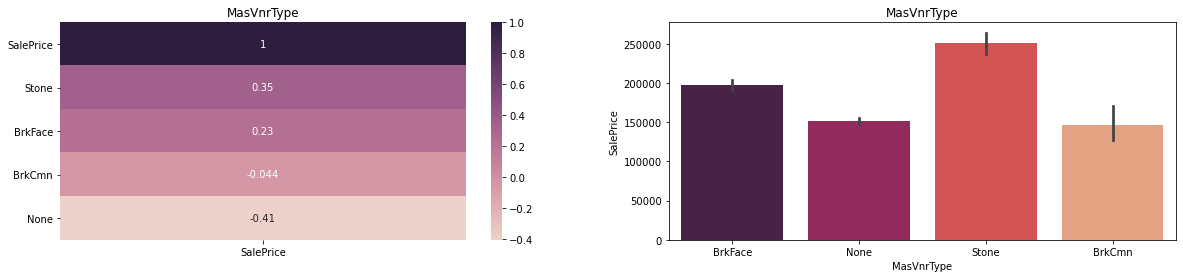

In [100]:
cat_corr_with_one_cont_column(categorical_df, 'MasVnrType')

new_values = {
    'None': 0,
    'BrkCmn': 1,
    'BrkFace': 2,
    'Stone': 3
}
update_categorical_with_numeric_values(categorical_df, 'MasVnrType', new_values)

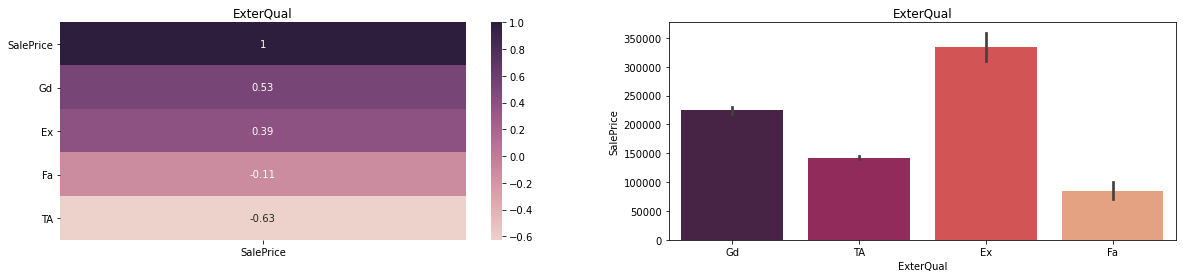

In [101]:
cat_corr_with_one_cont_column(categorical_df, 'ExterQual')

new_values = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}
update_categorical_with_numeric_values(categorical_df, 'ExterQual', new_values)

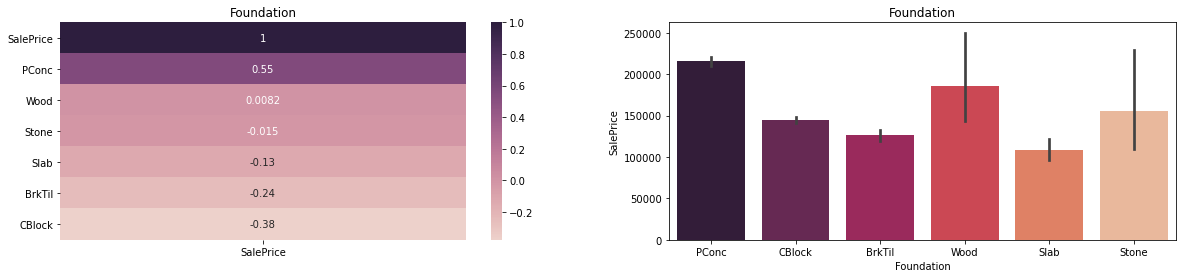

In [102]:
cat_corr_with_one_cont_column(categorical_df, 'Foundation')

new_values = {
    'Slab': 0,
    'BrkTil': 1,
    'CBlock': 2,
    'Stone': 3,
    'Wood': 4,
    'PConc': 5
}
update_categorical_with_numeric_values(categorical_df, 'Foundation', new_values)

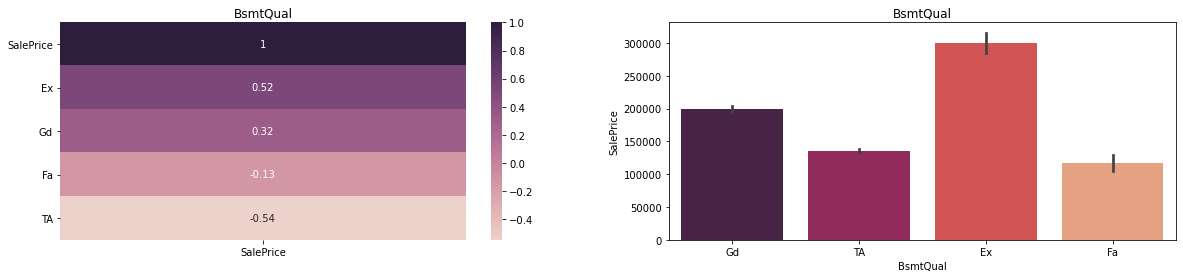

In [103]:
cat_corr_with_one_cont_column(categorical_df, 'BsmtQual')

new_values = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}
update_categorical_with_numeric_values(categorical_df, 'BsmtQual', new_values)

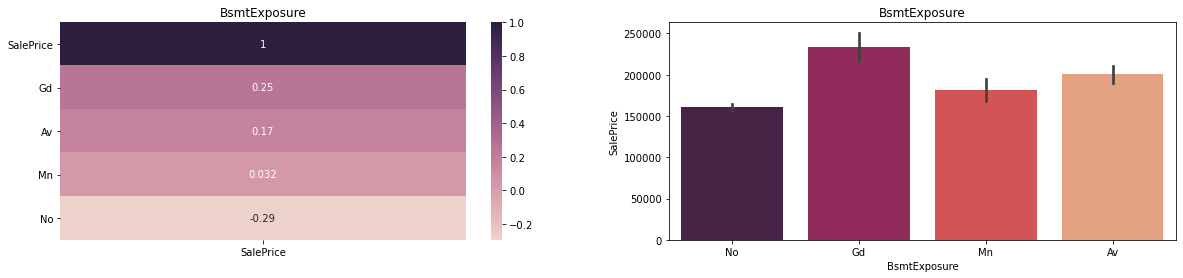

In [104]:
cat_corr_with_one_cont_column(categorical_df, 'BsmtExposure')

new_values = {
    'No': 0,
    'Mn': 1,
    'Av': 2,
    'Gd': 3
}
update_categorical_with_numeric_values(categorical_df, 'BsmtExposure', new_values)

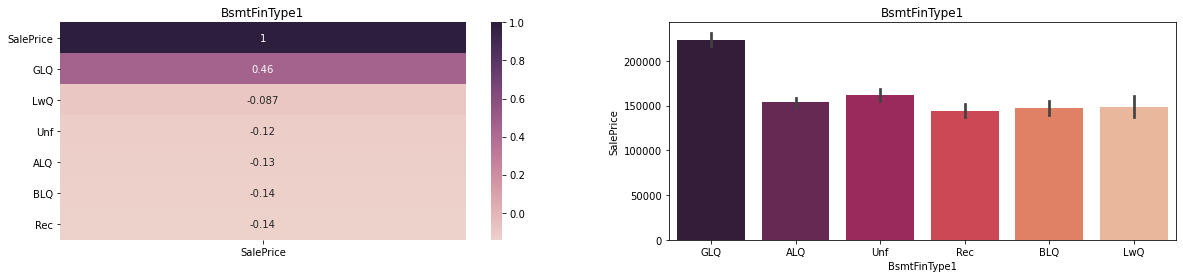

In [105]:
cat_corr_with_one_cont_column(categorical_df, 'BsmtFinType1')

new_values = {
    'Rec': 0,
    'BLQ': 1,
    'LwQ': 2,
    'ALQ': 3,
    'Unf': 4,
    'GLQ': 5
}
update_categorical_with_numeric_values(categorical_df, 'BsmtFinType1', new_values)

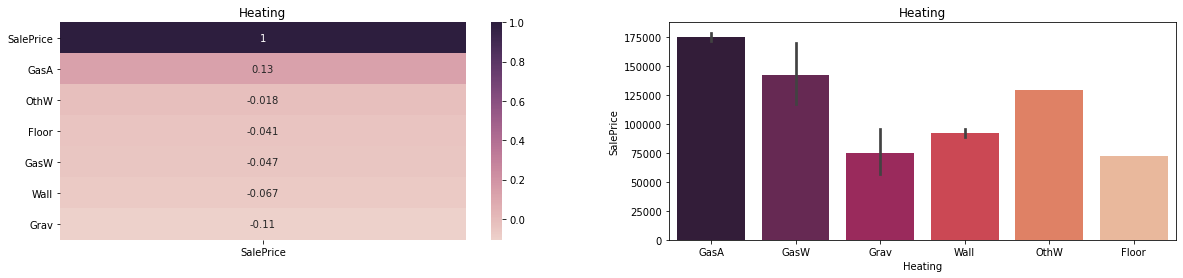

In [106]:
cat_corr_with_one_cont_column(categorical_df, 'Heating')
drop_df_column(categorical_df, 'Heating')

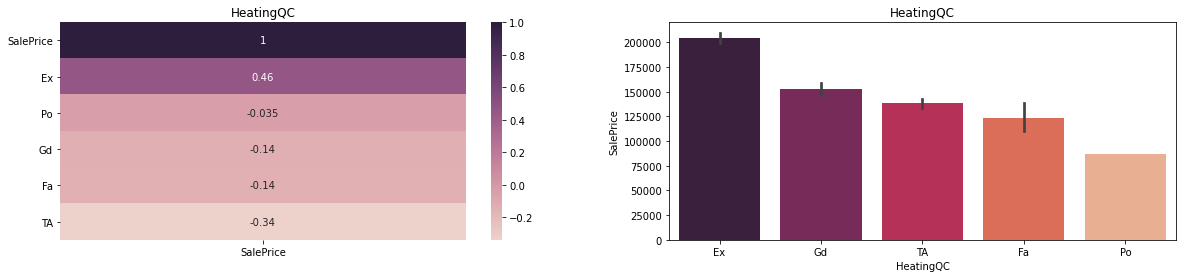

In [107]:
cat_corr_with_one_cont_column(categorical_df, 'HeatingQC')

new_values = {
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}
update_categorical_with_numeric_values(categorical_df, 'HeatingQC', new_values)

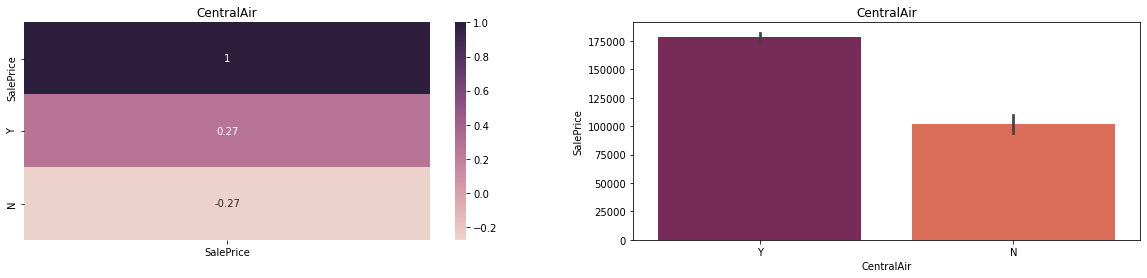

In [108]:
cat_corr_with_one_cont_column(categorical_df, 'CentralAir')

new_values = {
    'N': 0,
    'Y': 1
}
update_categorical_with_numeric_values(categorical_df, 'CentralAir', new_values)

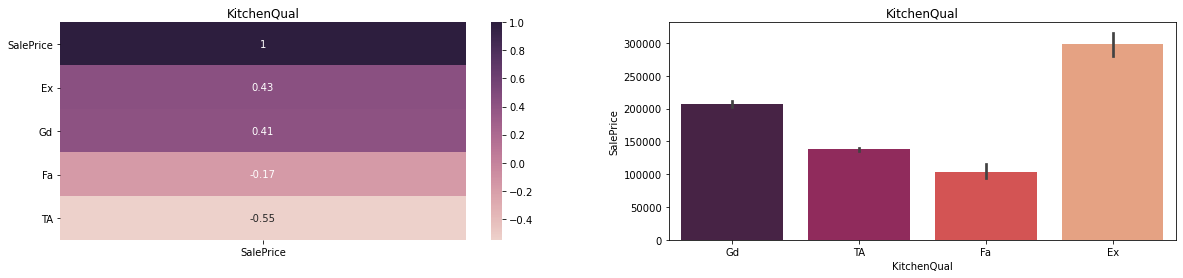

In [109]:
cat_corr_with_one_cont_column(categorical_df, 'KitchenQual')

new_values = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}
update_categorical_with_numeric_values(categorical_df, 'KitchenQual', new_values)

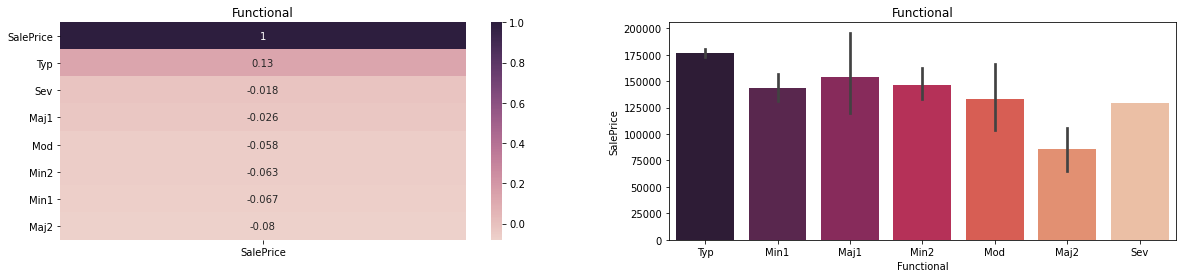

In [110]:
cat_corr_with_one_cont_column(categorical_df, 'Functional')
drop_df_column(categorical_df, 'Functional')

![](https://media.giphy.com/media/W08WTkpMWn4V0YauPA/giphy.gif)

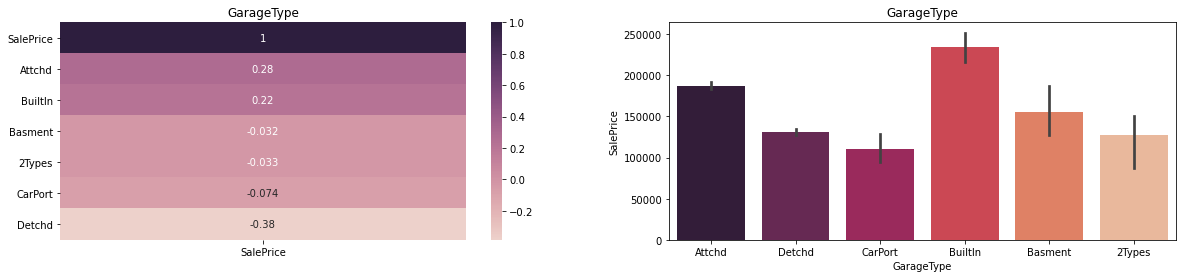

In [111]:
cat_corr_with_one_cont_column(categorical_df, 'GarageType')

new_values = {
    'CarPort': 0,
    'Detchd': 1,
    '2Types': 2,
    'Basment': 3,
    'Attchd': 4,
    'BuiltIn': 5
}
update_categorical_with_numeric_values(categorical_df, 'GarageType', new_values)

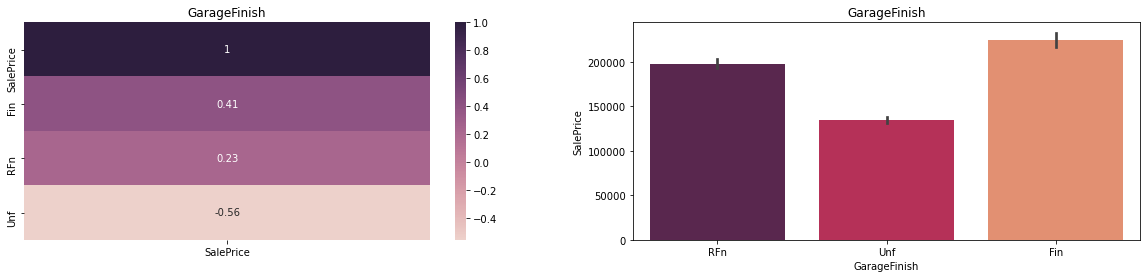

In [112]:
cat_corr_with_one_cont_column(categorical_df, 'GarageFinish')

new_values = {
    'Unf': 0,
    'RFn': 1,
    'Fin': 2
}
update_categorical_with_numeric_values(categorical_df, 'GarageFinish', new_values)

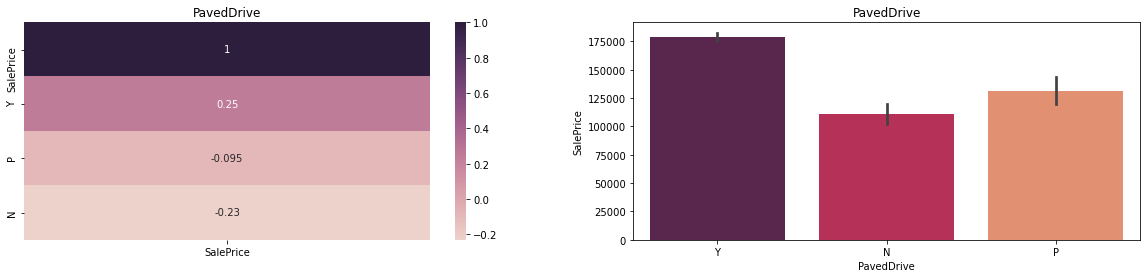

In [113]:
cat_corr_with_one_cont_column(categorical_df, 'PavedDrive')

new_values = {
    'N': 0,
    'P': 1,
    'Y': 2
}
update_categorical_with_numeric_values(categorical_df, 'PavedDrive', new_values)

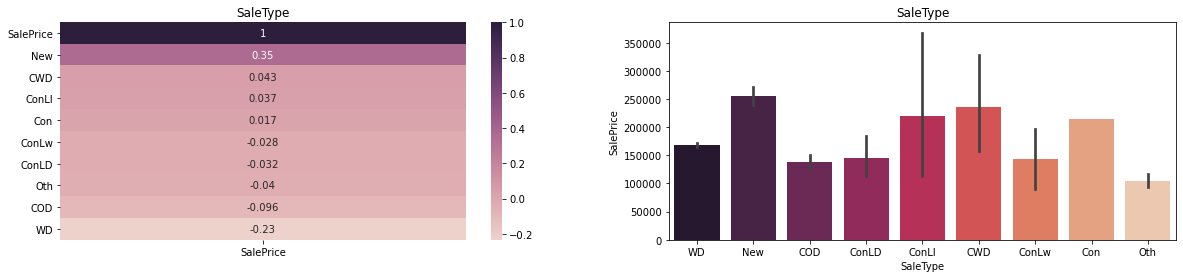

In [114]:
cat_corr_with_one_cont_column(categorical_df, 'SaleType')

new_values = {
    'Oth': 0,
    'COD': 1,
    'ConLD': 2,
    'ConLw': 3,
    'WD': 4,
    'Con': 5,
    'ConLI': 6,
    'CWD': 7,
    'New': 8
}
update_categorical_with_numeric_values(categorical_df, 'SaleType', new_values)

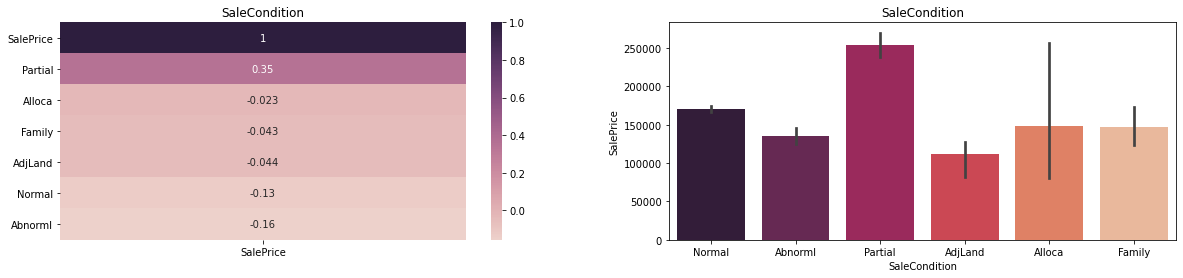

In [115]:
cat_corr_with_one_cont_column(categorical_df, 'SaleCondition')

new_values = {
    'AdjLand': 0,
    'Abnorml': 1,
    'Family': 2,
    'Alloca': 3,
    'Normal': 4,
    'Partial': 5
}
update_categorical_with_numeric_values(categorical_df, 'SaleCondition', new_values)

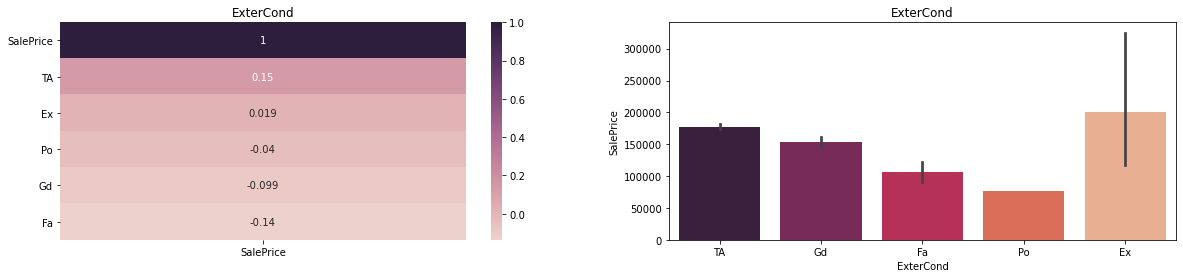

In [116]:
cat_corr_with_one_cont_column(categorical_df, 'ExterCond')
drop_df_column(categorical_df, 'ExterCond')

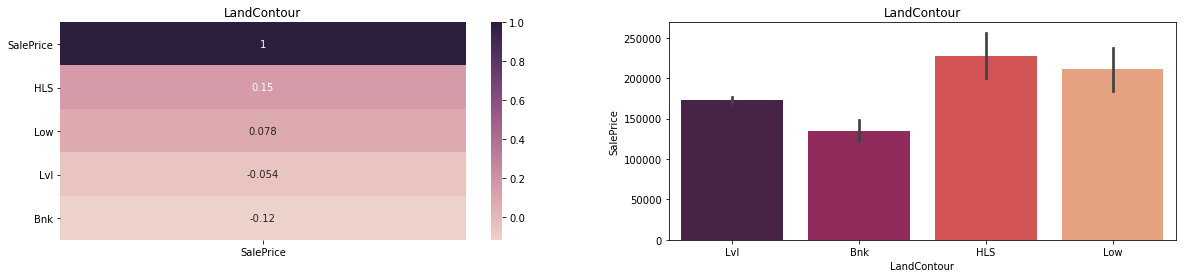

In [117]:
cat_corr_with_one_cont_column(categorical_df, 'LandContour')
drop_df_column(categorical_df, 'LandContour')

### Combining both the dataframes

In [118]:
# before combining, scale the `categorical_df`
scaling_df(categorical_df)

dataset_df = pd.concat([continuous_df, categorical_df], axis='columns')
dataset_with_dummies_df = pd.concat([continuous_df, categorical_dummies_df], axis='columns')

dataset_df.sample(5)

OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
612      1.488544   0.992225      0.780248    1.410007  0.536323  0.613349   
918      0.727136   0.650459      0.300489   -0.914527 -0.631229  2.181241   
1148     0.727136  -1.571023     -1.666526   -1.032975 -1.656985  0.530314   
1305     2.249951   1.163108      1.068104    2.846184  1.601300 -0.786031   
1348     0.727136   0.889695      0.636321    2.527856  1.124625 -0.786031   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
612       1.215605  0.889833  1.322291      0.277931      0.489692   
918       1.215605  0.889833  1.322291      1.719493      1.205437   
1148     -0.822636 -1.042003 -0.756263     -1.163632     -0.941798   
1305      1.215605  0.889833 -0.756263     -1.163632     -0.226053   
1348      1.215605  0.889833 -0.756263      0.277931     -0.941798   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea    MoSold    YrSold  \
612     0.691279     0.934971    0.367543    0.352387  1.743657  0.885662   
918     0.691279     0.547543    1.779459    1.893560  1.743657 -0.614449   
1148    0.691279     0.198858   -1.044373   -0.887697  0.628887  0.135606   
1305    2.325101     1.128685    0.367543    1.929283  1.743657  0.885662   
1348    0.691279     0.818742    0.367543    0.265632  0.628887 -0.614449   

      SalePrice  MSZoning  LotShape  Neighborhood  Exterior1st  Exterior2nd  \
612    1.299481  0.358760 -0.743073      0.716221     1.003306     1.041173   
918    0.950300  0.358760  1.245915      0.472669    -0.373690    -0.406424   
1148  -0.849101 -2.145044 -0.743073     -0.988641    -1.406436    -0.768323   
1305   2.243015  0.358760  1.245915      1.690428     1.003306     1.041173   
1348   0.608547  0.358760  0.251421      0.472669     1.003306     1.041173   

      MasVnrType  ExterQual  Foundation  BsmtQual  BsmtExposure  BsmtFinType1  \
612     1.011027   1.128140    1.082753  0.673550      1.395710      1.022941   
918    -0.791915   1.128140    1.082753  2.182529      0.393835     -1.446195   
1148   -0.791915  -0.692454    1.082753 -0.835429     -0.608039      0.405657   
1305    1.912498   1.128140    1.082753  2.182529     -0.608039      1.022941   
1348   -0.791915   1.128140    1.082753  0.673550      2.397584      1.022941   

      HeatingQC  CentralAir  KitchenQual  GarageType  GarageFinish  \
612    0.884621    0.254355     2.370933    1.278853      0.303448   
918    0.884621    0.254355     0.798568    0.567371      0.303448   
1148  -1.202459    0.254355    -0.773797   -1.567075     -0.944996   
1305   0.884621    0.254355     2.370933    0.567371      1.551891   
1348   0.884621    0.254355     0.798568    0.567371      0.303448   

      PavedDrive  SaleType  SaleCondition  SalePrice  
612     0.282286  -0.17132       0.186434   1.299481  
918     0.282286  -0.17132       0.186434   0.950300  
1148    0.282286  -0.17132       0.186434  -0.849101  
1305    0.282286  -0.17132       0.186434   2.243015  
1348    0.282286  -0.17132       0.186434   0.608547

In [119]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1333 non-null   float64
 1   YearBuilt      1333 non-null   float64
 2   YearRemodAdd   1333 non-null   float64
 3   BsmtFinSF1     1333 non-null   float64
 4   1stFlrSF       1333 non-null   float64
 5   2ndFlrSF       1333 non-null   float64
 6   BsmtFullBath   1333 non-null   float64
 7   FullBath       1333 non-null   float64
 8   HalfBath       1333 non-null   float64
 9   BedroomAbvGr   1333 non-null   float64
 10  TotRmsAbvGrd   1333 non-null   float64
 11  Fireplaces     1333 non-null   float64
 12  GarageYrBlt    1333 non-null   float64
 13  GarageCars     1333 non-null   float64
 14  GarageArea     1333 non-null   float64
 15  MoSold         1333 non-null   float64
 16  YrSold         1333 non-null   float64
 17  SalePrice      1333 non-null   float64
 18  MSZoning

## 🛳 Modelling

Let's create `machine learning` model in the `modelling` stage.

![](https://media.giphy.com/media/FIxjQGnjmNt5u/giphy.gif)

In [120]:
# tmp1_df = pd.DataFrame({'a': [1, 2, 3, 4]}, index=[10, 20, 30, 40])
# tmp2_df = pd.DataFrame({'b': [5, 6, 7, 8]}, index=[20, 30, 40, 50])
# pd.concat([tmp1_df, tmp2_df], axis='columns')

For modelling we'll use the `original_df` & not scaled one

In [121]:
dataset_df.drop(['SalePrice'], axis='columns', inplace=True)
dataset_with_dummies_df.drop(['SalePrice'], axis='columns', inplace=True)

dataset_df = pd.concat([dataset_df, original_y], axis='columns').reset_index(drop=True)
dataset_with_dummies_df = pd.concat([dataset_with_dummies_df, original_y], axis='columns').reset_index(drop=True)

dataset_df.sample(5)

OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
834     -0.795680   0.377045     -0.083319   -0.290210 -0.661398 -0.786031   
1161    -0.034272  -0.135604     -0.802959   -1.032975  1.109540 -0.786031   
1167    -0.034272  -0.169781     -0.419151    0.269948  1.818519 -0.786031   
659     -0.034272   0.137809      0.972152    0.282287 -1.195395  1.055387   
1080    -0.795680  -1.741906     -1.666526   -1.032975 -0.908786  0.491239   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
834       1.215605 -1.042003 -0.756263     -1.163632     -0.941798   
1161     -0.822636  0.889833 -0.756263      0.277931      0.489692   
1167      1.215605 -1.042003  1.322291      0.277931      0.489692   
659      -0.822636  0.889833  1.322291      0.277931     -0.226053   
1080     -0.822636 -1.042003  1.322291      0.277931      0.489692   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea    MoSold    YrSold  \
834    -0.942542     0.237601    0.367543    0.112535 -0.114292 -1.364504   
1161    0.691279    -0.343541    0.367543    0.000264  0.628887  0.885662   
1167    0.691279    -0.382283    0.367543    0.092122 -0.114292  0.885662   
659    -0.942542    -0.033598    0.367543    0.066606 -1.229062  1.635717   
1080    0.691279    -2.164450   -1.044373   -1.408226  0.257297  0.885662   

      MSZoning  LotShape  Neighborhood  Exterior1st  Exterior2nd  MasVnrType  \
834    0.35876  1.245915      0.229118    -0.373690    -0.406424   -0.791915   
1161   0.35876  1.245915      0.472669     0.659057     0.679274   -0.791915   
1167   0.35876  1.245915      0.472669    -0.373690    -0.406424    1.011027   
659    0.35876  1.245915     -0.745089    -0.373690    -0.044525    1.011027   
1080   0.35876  1.245915      0.959773    -1.406436    -0.768323   -0.791915   

      ExterQual  Foundation  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
834   -0.692454   -0.736545  0.673550      1.395710     -1.446195  -1.202459   
1161  -0.692454   -0.736545 -0.835429     -0.608039      0.405657  -0.158919   
1167  -0.692454   -0.736545  0.673550      1.395710     -0.211627  -2.245999   
659    1.128140   -0.736545 -0.835429     -0.608039      1.022941   0.884621   
1080  -0.692454   -1.342978 -0.835429     -0.608039      0.405657   0.884621   

      CentralAir  KitchenQual  GarageType  GarageFinish  PavedDrive  SaleType  \
834     0.254355    -0.773797    0.567371     -0.944996    0.282286  -0.17132   
1161    0.254355     0.798568    0.567371      0.303448    0.282286  -0.17132   
1167    0.254355    -0.773797    0.567371      0.303448    0.282286  -0.17132   
659     0.254355     0.798568    0.567371      0.303448    0.282286  -0.17132   
1080    0.254355    -0.773797   -1.567075     -0.944996    0.282286  -0.17132   

      SaleCondition  SalePrice  
834        0.186434     131000  
1161       0.186434     185750  
1167       0.186434     197900  
659        0.186434     130500  
1080       0.186434     154900

In [122]:
# instead of `dataset_df` we can also use `dataset_with_dummies_df`
columns = dataset_df.columns.tolist()
columns.remove('SalePrice')

x = np.array(dataset_df[columns].values)
y = np.array(dataset_df['SalePrice'].values.reshape(-1, 1))

print(f'Dataset size: {len(x)}')

Dataset size: 1333


Splitting the dataset.

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

print(f'Training dataset size: {len(x_train)} i.e. {round(len(x_train) / len(x), 2)}% of dataset')
print(f'Testing dataset size: {len(x_test)} i.e. {round(len(x_test) / len(x), 2)}% of dataset')

Training dataset size: 999 i.e. 0.75% of dataset
Testing dataset size: 334 i.e. 0.25% of dataset


Looking for good `ML` model using `cross validation score`.

In [124]:
kf = KFold(n_splits=10)

score = cross_val_score(Ridge(), x_train, y_train, cv=kf)
print(f'Ridge: {score.mean()}')

score = cross_val_score(LinearRegression(), x_train, y_train, cv=kf)
print(f'LinearRegression: {score.mean()}')

Ridge: 0.8737761974229172
LinearRegression: 0.8737247932323126


Finding the `best hyper-parameters` using `GridSearchCV` method.

In [125]:
def find_best_params(X, y, cv=10):
    alpha = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
    solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    
    params = {
        'alpha': alpha,
        'solver': solver
    }
    
    grid_search = GridSearchCV(Ridge(), param_grid=params, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_


find_best_params(x_train, y_train, kf)

{'alpha': 10, 'solver': 'auto'}

Plotting `learning curve`.

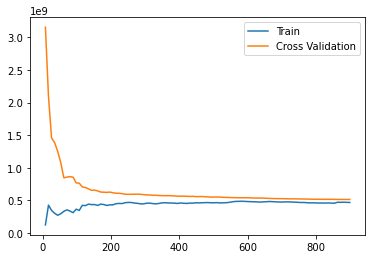

In [126]:
_size = np.arange(0.01, 1.01, 0.01)
train_sizes = np.array(_size)
scoring = 'neg_mean_squared_error'

train_sizes_abs, train_scores, cv_scores = learning_curve(
    Ridge(alpha=30, solver='sparse_cg'), 
    x_train, y_train, train_sizes=train_sizes, 
    cv=kf, scoring=scoring
)

train_scores_mean = []
for row in train_scores:
    _mean = row.mean()
    train_scores_mean.append(_mean)
    
cv_scores_mean = []
for row in cv_scores:
    _mean = row.mean()
    cv_scores_mean.append(_mean)    
    
train_scores_mean = -np.array(train_scores_mean)
cv_scores_mean = -np.array(cv_scores_mean)

plt.plot(train_sizes_abs, train_scores_mean, label='Train')
plt.plot(train_sizes_abs, cv_scores_mean, label='Cross Validation')

plt.legend()

In [127]:
model = Ridge(alpha=10, solver='sag')
model.fit(x_train, y_train)

Ridge(alpha=10, solver='sag')

## 🌯 Evaluation

In [128]:
# Out-Of-Sample Forecast

y_test_pred = model.predict(x_test)
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 25815.672950907287
R2-score: 0.8730554078685803


In [129]:
# Saving the model
dump(model, 'model.joblib')

['model.joblib']

Visualizing our `predictions` against `actual` values.

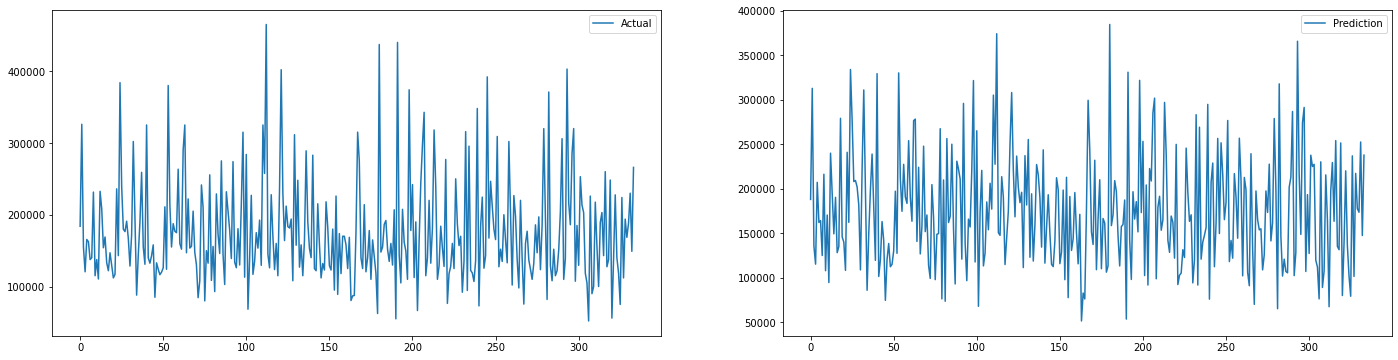

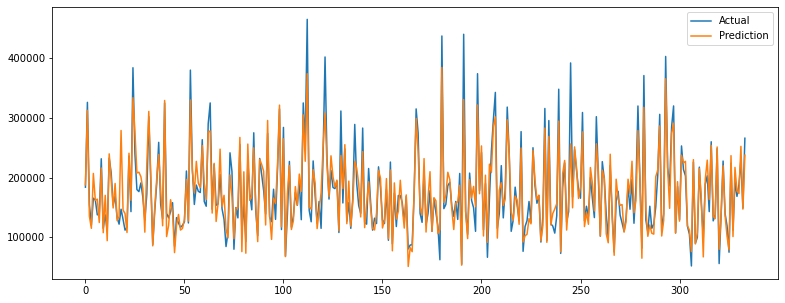

In [130]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax3.legend()

---

I'll wrap things up there. If you want to find some other answers then go ahead `edit` this kernel. If you have any `questions` then do let me know.

If this kernel helped you then don't forget to 🔼 `upvote` and share your 🎙 `feedback` on improvements of the kernel.

![](https://media.giphy.com/media/l2Jeb2KyB09KnvFTi/giphy.gif)

---